In [2]:
import numpy as np
import pandas as pd
import os
# Constants
NUM_ROWS = 300000
accident_probability = 0.0007904958704959287

# Age distributions
age_groups = {
    '17-18': (17, 18, 0.0035),
    '19-24': (19, 24, 0.0565),
    '25-34': (25, 34, 0.1274),
    '35-44': (35, 44, 0.1265),
    '45-54': (45, 54, 0.0983),
    '55-64': (55, 64, 0.0638),
    '65+': (65, 100, 0.0504)
}
age_proportions = [group[2] for group in age_groups.values()]
age_proportions = np.array(age_proportions) / sum(age_proportions)  # Normalize
age_group_names = list(age_groups.keys())

# Area distributions
area_categories = ['Valleys Area', 'Negev Area', 'Hasharon Area', 'Coastal Area',
                   'Eilat Area', 'Lachish Area', 'Jerusalem District', 'Haifa Area',
                   'Galilee Area', 'Shomron Area']
area_proportions = [7.90, 7.61, 34.77, 13.09, 3.07, 7.88, 4.00, 8.49, 10.54, 2.65]
area_proportions = np.array(area_proportions) / sum(area_proportions)  # Normalize

# Road type distributions
road_types = ['Urban', 'Non-Urban']
road_type_proportions = [0.5693, 0.4307]
road_type_probs = [0.2645, 0.7355]  # Probabilities for accidents (Non-Urban, Urban)

# Time distributions
hours = list(range(24))
traffic_percentage = [0.5, 0.3, 0.2, 0.2, 0.4, 1.2, 3.0, 6.0, 7.0, 6.5, 6.5, 6.5, 6.5, 6.5,
                      6.5, 6.5, 6.5, 6.5, 6.0, 5.0, 3.5, 2.5, 1.5, 0.8]
time_proportions = np.array(traffic_percentage) / sum(traffic_percentage)  # Normalize
hour_probs = [0.0950, 0.1154, 0.1248, 0.1047, 0.0563, 0.0563, 0.0563, 0.0563,
              0.0563, 0.0563, 0.0563, 0.0563, 0.0563, 0.0563, 0.0600, 0.0500,
              0.0350, 0.0250, 0.0150, 0.0080, 0.0076, 0.0076, 0.0076, 0.0076]

# Police unit probabilities
police_unit_probs = [0.2059, 0.1998, 0.0422, 0.0565, 0.0893, 0.0772, 0.0787, 0.0598, 0.1052, 0.0853]

# Age group probabilities
age_group_probs = [0.1929, 0.1692, 0.1428, 0.1265, 0.1177, 0.1160, 0.1349]

# Generate Data
np.random.seed(42)  # For reproducibility

# ID
ids = np.arange(1, NUM_ROWS + 1)

# Age Group Assignment
age_group_choices = np.random.choice(age_group_names, size=NUM_ROWS, p=age_proportions)

# Assign a specific age within each group
age_choices = []
for group in age_group_choices:
    min_age, max_age, _ = age_groups[group]
    age_choices.append(np.random.randint(min_age, max_age + 1))  # Uniformly within group

# Area
area_choices = np.random.choice(area_categories, size=NUM_ROWS, p=area_proportions)

# Road Type
road_choices = np.random.choice(road_types, size=NUM_ROWS, p=road_type_proportions)

# Time (hour, minute, second)
hour_choices = np.random.choice(hours, size=NUM_ROWS, p=time_proportions)
minute_choices = np.random.randint(0, 60, size=NUM_ROWS)
second_choices = np.random.randint(0, 60, size=NUM_ROWS)
time_choices = [f"{hour:02}:{minute:02}:{second:02}" for hour, minute, second in zip(hour_choices, minute_choices, second_choices)]

# Combine into a DataFrame
synthetic_data = pd.DataFrame({
    "ID": ids,
    "Age": age_choices,
    "Area": area_choices,
    "Road Type": road_choices,
    "Time": time_choices,
    "Accident": None  # Placeholder for accident labels
})

# Function to calculate accident probability
def calculate_accident_probability(row, base_prob):
    # Adjust for road type
    road_type_index = 0 if row['Road Type'] == 'Non-Urban' else 1
    road_type_weight = road_type_probs[road_type_index]

    # Adjust for area
    area_index = area_categories.index(row['Area'])
    area_weight = police_unit_probs[area_index]

    # Adjust for age group
    for group_name, (min_age, max_age, _) in age_groups.items():
        if min_age <= row['Age'] <= max_age:
            age_index = age_group_names.index(group_name)
            age_weight = age_group_probs[age_index]
            break

    # Adjust for time
    hour = int(row['Time'].split(':')[0])
    time_weight = hour_probs[hour]

    # Calculate final weighted probability
    weighted_prob = base_prob * road_type_weight * area_weight * age_weight * time_weight
    return weighted_prob

# Generate accident labels
np.random.seed(42)  # For reproducibility
accident_labels = []

for _, row in synthetic_data.iterrows():
    accident_prob = calculate_accident_probability(row, accident_probability)
    accident_labels.append(1 if np.random.rand() < accident_prob else 0)

# Add accident labels to the dataset
synthetic_data['Accident'] = accident_labels

output_file_path = os.path.join(os.getcwd(), 'simulated_trip_dataset_with_accidents.csv')
synthetic_data.to_csv(output_file_path, index=False)

print(f"Updated dataset saved to: {output_file_path}")

Updated dataset saved to: /Users/sgahtan/Desktop/shira/studies/project/Project-RideShare/simulated_trip_dataset_with_accidents.csv


In [3]:
import numpy as np
import pandas as pd

# Constants
NUM_ROWS = 300000
accident_probability = 0.0007904958704959287

# Age distributions
age_groups = {
    '17-18': (17, 18, 0.0035),
    '19-24': (19, 24, 0.0565),
    '25-34': (25, 34, 0.1274),
    '35-44': (35, 44, 0.1265),
    '45-54': (45, 54, 0.0983),
    '55-64': (55, 64, 0.0638),
    '65+': (65, 100, 0.0504)
}
age_proportions = [group[2] for group in age_groups.values()]
age_proportions = np.array(age_proportions) / sum(age_proportions)
age_group_names = list(age_groups.keys())

# Area distributions
area_categories = ['Valleys Area', 'Negev Area', 'Hasharon Area', 'Coastal Area',
                   'Eilat Area', 'Lachish Area', 'Jerusalem District', 'Haifa Area',
                   'Galilee Area', 'Shomron Area']
area_proportions = [7.90, 7.61, 34.77, 13.09, 3.07, 7.88, 4.00, 8.49, 10.54, 2.65]
area_proportions = np.array(area_proportions) / sum(area_proportions)

# Road type distributions
road_types = ['Urban', 'Non-Urban']
road_type_proportions = [0.5693, 0.4307]
road_type_probs = [0.2645, 0.7355]  # Probabilities for accidents (Non-Urban, Urban)

# Time distributions
hours = list(range(24))
traffic_percentage = [0.5, 0.3, 0.2, 0.2, 0.4, 1.2, 3.0, 6.0, 7.0, 6.5, 6.5, 6.5, 6.5, 6.5,
                      6.5, 6.5, 6.5, 6.5, 6.0, 5.0, 3.5, 2.5, 1.5, 0.8]
time_proportions = np.array(traffic_percentage) / sum(traffic_percentage)
hour_probs = [
    0.0950, 0.1154, 0.1248, 0.1047, 0.0564, 0.0275, 0.0177, 0.0152,
    0.0139, 0.0142, 0.0144, 0.0164, 0.0185, 0.0183, 0.0201, 0.0208,
    0.0212, 0.0217, 0.0224, 0.0256, 0.0324, 0.0387, 0.0542, 0.0906
]

# Function to calculate accident probability using Bayes' Theorem
def calculate_bayes_probability(row, base_prob):
    # Numerator: P(Time, Area, Age, Road Type | Accident) * P(Accident)
    time_weight = hour_probs[int(row['Time'].split(':')[0])]
    area_weight = police_unit_probs[area_categories.index(row['Area'])]
    age_weight = age_group_probs[next(i for i, (min_age, max_age, _) in enumerate(age_groups.values())
                                      if min_age <= row['Age'] <= max_age)]
    road_type_weight = road_type_probs[0 if row['Road Type'] == 'Non-Urban' else 1]
    numerator = base_prob * time_weight * area_weight * age_weight * road_type_weight

    # Denominator: P(Time, Area, Age, Road Type)
    denominator = time_weight * area_weight * age_weight * road_type_weight

    return numerator / denominator

# Generate accident labels for each row according to the calculated probability
np.random.seed(42)
synthetic_data['Accident'] = synthetic_data.apply(
    lambda row: 1 if np.random.rand() < calculate_bayes_probability(row, accident_probability) else 0,
    axis=1
)

output_file_path = os.path.join(os.getcwd(), 'simulated_trip_dataset_with_accidents.csv')
synthetic_data.to_csv(output_file_path, index=False)

print(f"Updated dataset saved to: {output_file_path}")

Updated dataset saved to: /Users/sgahtan/Desktop/shira/studies/project/Project-RideShare/simulated_trip_dataset_with_accidents.csv


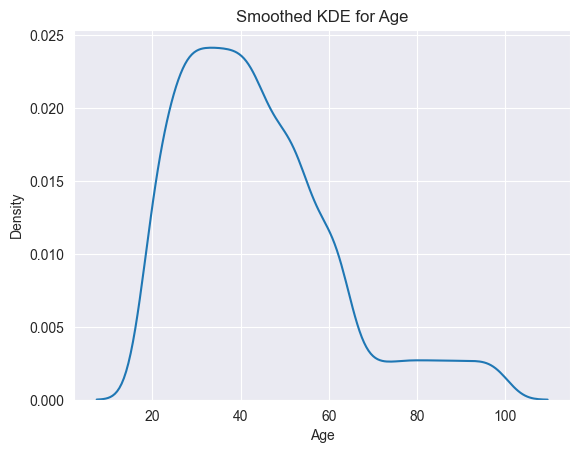

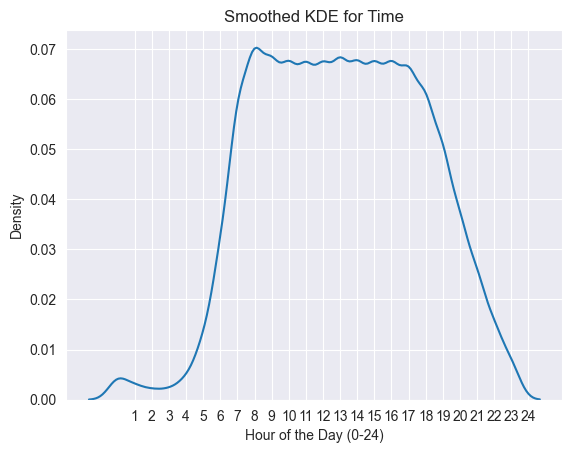

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic data for Age
age_data = []
for group, (min_age, max_age, prob) in age_groups.items():
    count = int(prob * NUM_ROWS)
    age_data.extend(np.random.randint(min_age, max_age + 1, size=count))

# Generate synthetic data for Time
time_data = np.random.choice(hours, size=NUM_ROWS, p=time_proportions)

# KDE for Age
sns.kdeplot(age_data, bw_adjust=2.0)
plt.title("Smoothed KDE for Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

# KDE for Time with x-axis as 0-24 hours
sns.kdeplot(time_data, bw_adjust=1.5)
plt.title("Smoothed KDE for Time")
plt.xlabel("Hour of the Day (0-24)")
plt.xticks(range(1, 25, 1))  # Set x-ticks explicitly for each hour
plt.ylabel("Density")
plt.show()


In [5]:
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde

# Constants
NUM_ROWS = 300000

# Area distributions
area_categories = ['Valleys Area', 'Negev Area', 'Hasharon Area', 'Coastal Area',
                   'Eilat Area', 'Lachish Area', 'Jerusalem District', 'Haifa Area',
                   'Galilee Area', 'Shomron Area']
area_proportions = [7.90, 7.61, 34.77, 13.09, 3.07, 7.88, 4.00, 8.49, 10.54, 2.65]
area_proportions = np.array(area_proportions) / sum(area_proportions)

# Road type distributions
road_types = ['Urban', 'Non-Urban']
road_type_proportions = [0.5693, 0.4307]

# Generate synthetic data for KDE
# Simulated Age Data (from distributions)
age_groups = {
    '17-18': (17, 18, 0.0035),
    '19-24': (19, 24, 0.0565),
    '25-34': (25, 34, 0.1274),
    '35-44': (35, 44, 0.1265),
    '45-54': (45, 54, 0.0983),
    '55-64': (55, 64, 0.0638),
    '65+': (65, 100, 0.0504)
}
age_data = []
for group, (min_age, max_age, prob) in age_groups.items():
    count = int(prob * NUM_ROWS)
    age_data.extend(np.random.randint(min_age, max_age + 1, size=count))

# Simulated Time Data (from hourly traffic distribution)
hours = list(range(24))
traffic_percentage = [0.5, 0.3, 0.2, 0.2, 0.4, 1.2, 3.0, 6.0, 7.0, 6.5, 6.5, 6.5, 6.5, 6.5,
                      6.5, 6.5, 6.5, 6.5, 6.0, 5.0, 3.5, 2.5, 1.5, 0.8]
time_proportions = np.array(traffic_percentage) / sum(traffic_percentage)
time_data = np.random.choice(hours, size=NUM_ROWS, p=time_proportions)

# ----------------------- Part 1: KDE for Age and Time -----------------------


In [6]:
# KDE for Age
age_kde = gaussian_kde(age_data)
sampled_ages = age_kde.resample(NUM_ROWS).flatten()
sampled_ages = np.clip(sampled_ages, 17, 100).astype(int)  # Clip to realistic age bounds

# KDE for Time
time_kde = gaussian_kde(time_data)
sampled_times = time_kde.resample(NUM_ROWS).flatten()
sampled_times = np.clip(sampled_times, 0, 23).astype(int)  # Clip to 24-hour bounds

# Generate Time Strings
minute_choices = np.random.randint(0, 60, size=NUM_ROWS)
second_choices = np.random.randint(0, 60, size=NUM_ROWS)
sampled_time_strings = [f"{hour:02}:{minute:02}:{second:02}" for hour, minute, second in zip(sampled_times, minute_choices, second_choices)]

# ----------------------- Part 1: Generate Random Dataset -----------------------


In [7]:
# IDs
ids = np.arange(1, NUM_ROWS + 1)

# Assign random areas and road types
area_choices = np.random.choice(area_categories, size=NUM_ROWS, p=area_proportions)
road_choices = np.random.choice(road_types, size=NUM_ROWS, p=road_type_proportions)

# Create the DataFrame
random_data = pd.DataFrame({
    "ID": ids,
    "Age": sampled_ages,  # KDE-based ages
    "Area": area_choices,
    "Road Type": road_choices,
    "Time": sampled_time_strings  # KDE-based times
})

# Save the random dataset
random_dataset_path = os.path.join(os.getcwd(), 'random_dataset.csv')
random_data.to_csv(random_dataset_path, index=False)

print(f"Random dataset saved to: {random_dataset_path}")

Random dataset saved to: /Users/sgahtan/Desktop/shira/studies/project/Project-RideShare/random_dataset.csv


KDE Plot for Age Distribution Using Accident Data

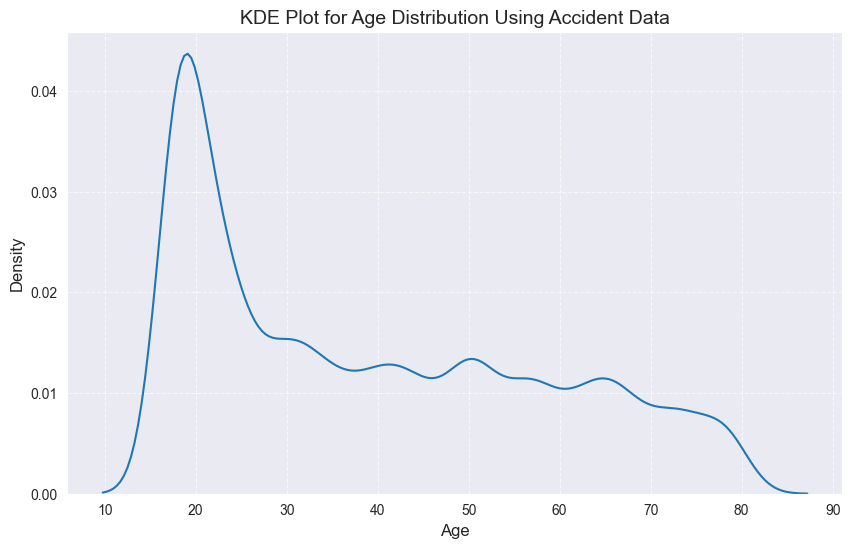

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data provided
age_group_probs = [0.1929, 0.1692, 0.1428, 0.1265, 0.1177, 0.1160, 0.1349]
age_groups = ['17-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Generate age values based on probabilities
age_values = []

for group, prob in zip(age_groups, age_group_probs):
    size = int(prob * 1000)  # Scale to generate a proportional sample size
    if '-' in group:
        low, high = map(int, group.split('-'))
        age_values.extend(np.random.uniform(low=low, high=high + 1, size=size))
    else:  # Handle '65+' group
        age_values.extend(np.random.uniform(low=65, high=80, size=size))

# Convert to NumPy array for compatibility
age_values = np.array(age_values, dtype=float)

# Create the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(age_values, bw_adjust=0.5)
plt.title('KDE Plot for Age Distribution Using Accident Data', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


KDE Plot for Hourly Accident Distribution Based on Accident Data

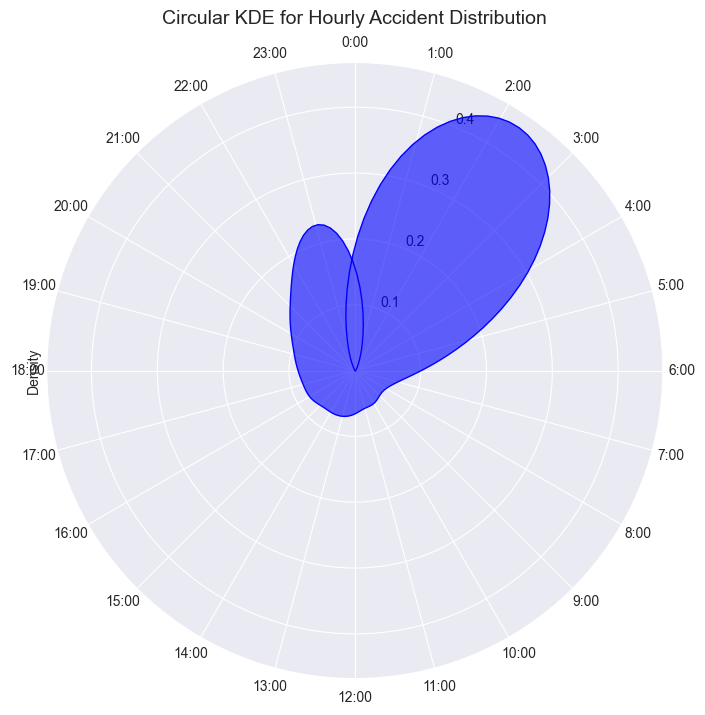

In [9]:
# Circular KDE Plot for Hourly Accident Distribution Based on Accident Data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Updated probabilities
hours = list(range(24))
normalized_scaled_array = [
    0.0950, 0.1154, 0.1248, 0.1047, 0.0564, 0.0275, 0.0177, 0.0152,
    0.0139, 0.0142, 0.0144, 0.0164, 0.0185, 0.0183, 0.0201, 0.0208,
    0.0212, 0.0217, 0.0224, 0.0256, 0.0324, 0.0387, 0.0542, 0.0906
]

# Generate hour values based on updated probabilities
hour_values = []
for hour, prob in zip(hours, normalized_scaled_array):
    size = int(prob * 1000)  # Scale to generate a proportional sample size
    hour_values.extend(np.random.uniform(low=hour, high=hour + 1, size=size))

# Convert hour values to angles for circular plot (24-hour cycle)
angles = np.deg2rad(np.array(hour_values) * 15)  # Convert hours to degrees (15° per hour)

# Create the circular KDE plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
sns.kdeplot(angles, bw_adjust=0.4, fill=True, alpha=0.6, ax=ax, color="blue")
ax.set_theta_direction(-1)  # Set clockwise direction
ax.set_theta_offset(np.pi / 2)  # Set 12 o'clock as the top

# Customize the plot
ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))  # Set hour labels
ax.set_xticklabels([f"{i}:00" for i in range(24)])  # Format hour labels
ax.set_title('Circular KDE for Hourly Accident Distribution', va='bottom', fontsize=14)

plt.show()

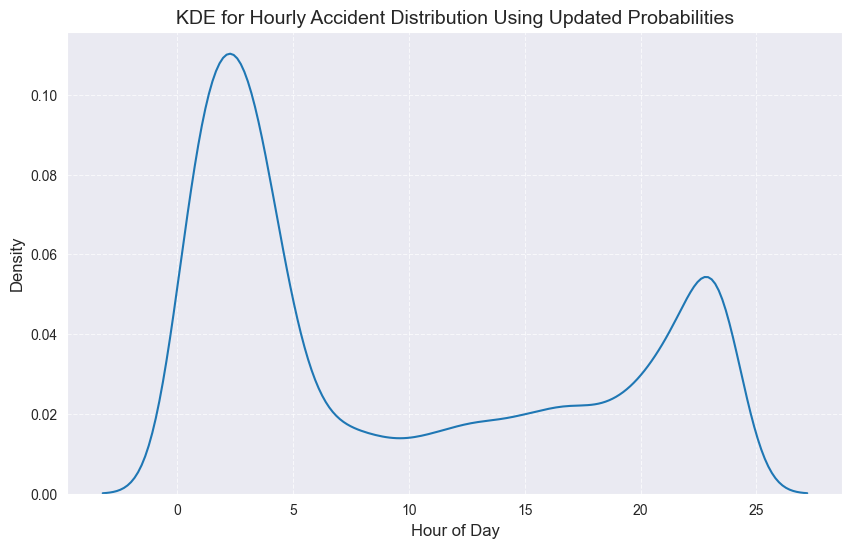

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Updated probabilities
hours = list(range(24))
normalized_scaled_array = [
    0.0950, 0.1154, 0.1248, 0.1047, 0.0564, 0.0275, 0.0177, 0.0152,
    0.0139, 0.0142, 0.0144, 0.0164, 0.0185, 0.0183, 0.0201, 0.0208,
    0.0212, 0.0217, 0.0224, 0.0256, 0.0324, 0.0387, 0.0542, 0.0906
]

# Generate hour values based on updated probabilities
hour_values = []
for hour, prob in zip(hours, normalized_scaled_array):
    size = int(prob * 1000)  # Scale to generate a proportional sample size
    hour_values.extend(np.random.uniform(low=hour, high=hour + 1, size=size))

# Convert to NumPy array for compatibility
hour_values = np.array(hour_values, dtype=float)

# Create the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(hour_values, bw_adjust=0.5)
plt.title('KDE for Hourly Accident Distribution Using Updated Probabilities', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
file_paths = {
    2018: './Datasets/data_accidents_israel_by_year/2018/2018_data.csv',
    2019: './Datasets/data_accidents_israel_by_year/2019/2019_data.csv',
    2020: './Datasets/data_accidents_israel_by_year/2020/2020_data.csv',
    2021: './Datasets/data_accidents_israel_by_year/2021/2021_data.csv',
    2022: './Datasets/data_accidents_israel_by_year/2022/2022_data.csv'
}

# List to hold data from all years
all_data = []

# Loop through each year and load the data
for year, path in file_paths.items():
    try:
        # Load the dataset
        data = pd.read_csv(path)

        # Add a column for the year to identify data
        data['Year'] = year

        # Append to the list
        all_data.append(data)
    except FileNotFoundError:
        print(f"File for {year} not found at path: {path}")
        continue

# Combine all datasets
df = pd.concat(all_data, ignore_index=True)

# Count non-empty rows
non_empty_rows = df.dropna(how='all').shape[0]
print(f"Total number of non-empty rows in the combined dataset: {non_empty_rows}")



# Define age distribution
age_group_probs = [0.1929, 0.1692, 0.1428, 0.1265, 0.1177, 0.1160, 0.1349]
age_groups = ['17-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Number of rows in the dataset
num_samples = len(df)

# Generate age values based on probabilities
age_values = []

for group, prob in zip(age_groups, age_group_probs):
    size = int(prob * num_samples)  # Scale to dataset size
    if '-' in group:
        low, high = map(int, group.split('-'))
        age_values.extend(np.random.uniform(low=low, high=high + 1, size=size))
    else:  # Handle '65+' group
        age_values.extend(np.random.uniform(low=65, high=80, size=size))

# Shuffle and truncate/extrapolate to match dataset size
np.random.shuffle(age_values)
if len(age_values) > num_samples:
    age_values = age_values[:num_samples]
else:
    extra_values = np.random.choice(age_values, num_samples - len(age_values))
    age_values = np.concatenate((age_values, extra_values))

# Convert to integer and add to the dataframe
df["AGE"] = age_values.astype(int)


columns_to_keep = ["SHAA", "AGE", "SUG_DEREH", "YEHIDA"]
df = df[columns_to_keep]

# Define mappings for YEHIDA
yehida_mapping = {
    11: "Coastal Area", 12: "Galilee Area", 14: "Valleys Area",
    20: "Haifa Area", 33: "Eilat Area", 34: "Negev Area",
    36: "Sharon (pre-2004)", 37: "Sharon (post-2004)", 38: "Lachish Area",
    41: "Shomron Area", 43: "Judea Area", 51: "Hasharon Area",
    52: "Hashfela Area", 61: "Jerusalem District"
}

# Apply YEHIDA mapping
df["YEHIDA"] = df["YEHIDA"].map(yehida_mapping)

# Define mappings for SUG_DEREH
sug_derech_mapping = {1: "Urban", 2: "Urban", 3: "Non-Urban", 4: "Non-Urban"}

# Apply SUG_DEREH mapping
df["SUG_DEREH"] = df["SUG_DEREH"].map(sug_derech_mapping)

# Define time ranges for SHAA
time_ranges = {
    i: f"{h:02d}:{m:02d}-{h:02d}:{m+14:02d}"
    for i, (h, m) in enumerate([(hr, mn) for hr in range(24) for mn in range(0, 60, 15)], start=1)
}

# Function to generate a random time within a given range
def generate_random_time_with_seconds(time_range):
    start, end = time_range.split('-')
    start_hour, start_minute = map(int, start.split(':'))
    end_hour, end_minute = map(int, end.split(':'))

    # Generate a random minute and second within the range
    rand_minute = random.randint(start_minute, end_minute)
    rand_second = random.randint(0, 59)  # Random second between 0 and 59

    return f"{start_hour:02d}:{rand_minute:02d}:{rand_second:02d}"
# Apply time transformation to SHAA
df["SHAA"] = df["SHAA"].map(time_ranges).apply(generate_random_time_with_seconds)
df.head(10)
output_file_path = './cleanData.csv'
df.to_csv(output_file_path, index=False)



Total number of non-empty rows in the combined dataset: 58060


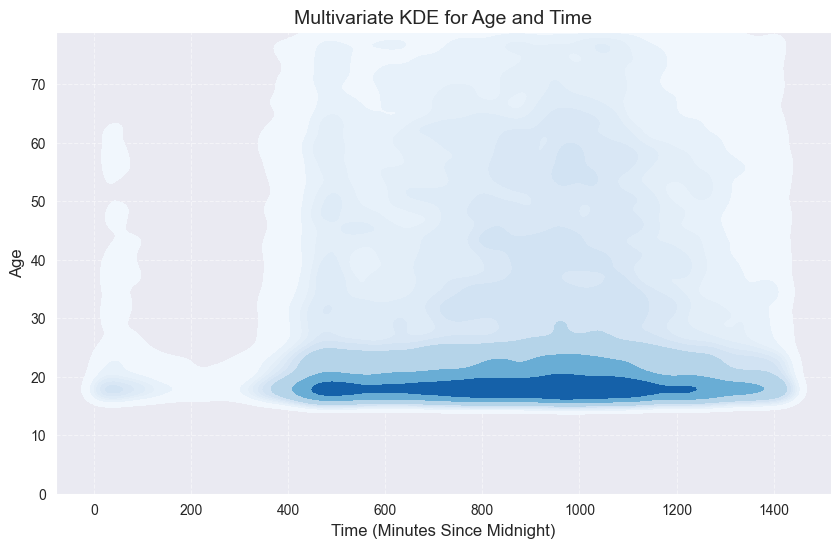

/var/folders/41/w6jzpcx12jn19d6sw459fl_r0000gp/T/ipykernel_43197/2994840817.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["YEHIDA"], y=df["SHAA_numeric"], inner=None, palette="Blues")


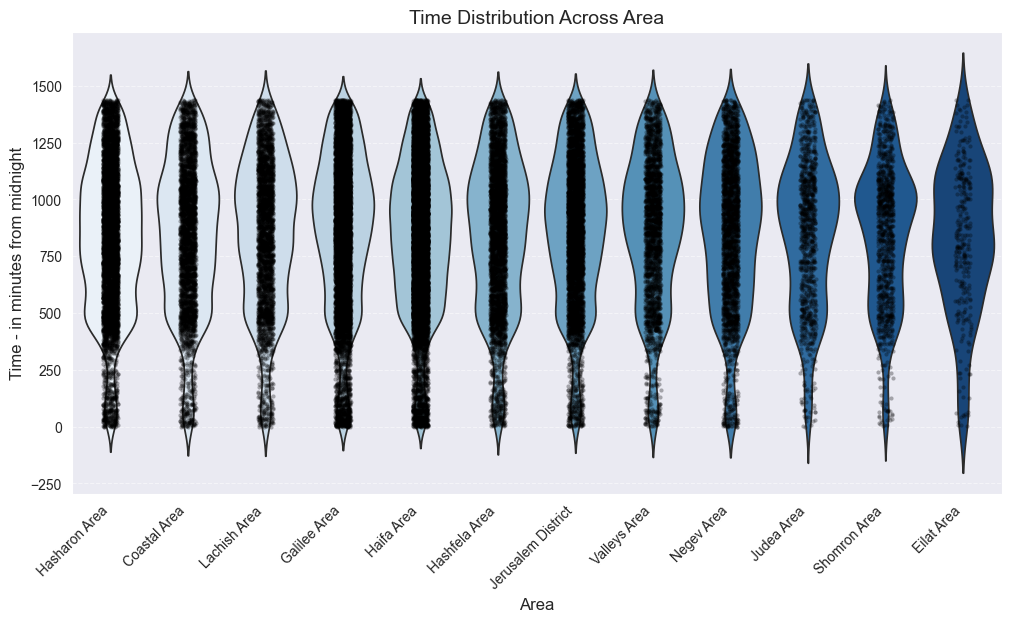

In [12]:
# Complete code to load the dataset, generate age values, and update the dataframe

# Convert SHAA (time) to numerical values in minutes since midnight for KDE plot
df["SHAA_numeric"] = df["SHAA"].apply(lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]))

# Generate the KDE plot for Age vs. Time (in minutes since midnight)
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df["SHAA_numeric"], y=df["AGE"], fill=True, cmap="Blues", bw_adjust=0.5)

# Set labels, title, and adjust y-axis to start from 0
plt.xlabel("Time (Minutes Since Midnight)", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.title("Multivariate KDE for Age and Time", fontsize=14)
plt.ylim(0, df["AGE"].max())  # Ensure the y-axis starts at 0

# Show the plot
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Display the updated dataframe
df.head(10)

# Create a violin plot for AGE distribution across YEHIDA categories
plt.figure(figsize=(12, 6))
sns.violinplot(x=df["YEHIDA"], y=df["SHAA_numeric"], inner=None, palette="Blues")

# Overlay with a strip plot to show individual points
sns.stripplot(x=df["YEHIDA"], y=df["SHAA_numeric"], jitter=True, color="black", alpha=0.3, size=3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Set labels and title
plt.xlabel("Area", fontsize=12)
plt.ylabel("Time - in minutes from midnight", fontsize=12)
plt.title("Time Distribution Across Area", fontsize=14)

# Show the plot
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.interpolate import RectBivariateSpline

# Load the dataset
file_path = "./cleanData.csv"
df = pd.read_csv(file_path)

# Convert SHAA (time) to fractional hours
df['SHAA'] = pd.to_datetime(df['SHAA'], format='%H:%M:%S').dt.hour + \
             pd.to_datetime(df['SHAA'], format='%H:%M:%S').dt.minute / 60 + \
             pd.to_datetime(df['SHAA'], format='%H:%M:%S').dt.second / 3600

# Extract time and age for KDE
time_values = df["SHAA"].values
age_values = df["AGE"].values

# Fit a 2D KDE model
kde = gaussian_kde(np.vstack([time_values, age_values]))

# Create a grid for interpolation
time_grid = np.linspace(min(time_values), max(time_values), 100)
age_grid = np.linspace(min(age_values), max(age_values), 100)
X, Y = np.meshgrid(time_grid, age_grid)
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

# Interpolation function for KDE
kde_spline = RectBivariateSpline(time_grid, age_grid, Z)

# Define bins for time and age
num_bins = 20

df["Time_Bin"] = pd.cut(df["SHAA"], bins=num_bins, labels=False)
df["Age_Bin"] = pd.cut(df["AGE"], bins=num_bins, labels=False)

# Compute P(Road Type | Time, Age)
road_type_probs = df.groupby(["Time_Bin", "Age_Bin"])["SUG_DEREH"].value_counts(normalize=True).unstack()

# Compute P(Police Unit | Time, Age)
police_unit_probs = df.groupby(["Time_Bin", "Age_Bin"])["YEHIDA"].value_counts(normalize=True).unstack()

# Convert probability tables to dictionaries for fast lookup
road_type_dict = road_type_probs.to_dict()
police_unit_dict = police_unit_probs.to_dict()

# Laplace smoothing factor
SMOOTHING_FACTOR = 1

def accident_probability(time, age, road_type, police_unit):
    """
    Computes the probability of an accident given time, age, road type, and police unit,
    with Laplace smoothing for missing values.

    Parameters:
    - time (float): Fractional hour (e.g., 14.5 for 14:30).
    - age (int): Age of the driver.
    - road_type (str): Either "Urban" or "Non-Urban".
    - police_unit (str): Name of the police unit.

    Returns:
    - Smoothed probability estimate (float).
    """
    # Get KDE density value (continuous interpolation)
    kde_prob = kde_spline.ev(time, age)

    # Find the corresponding bin for time and age
    time_bin = np.digitize(time, time_grid) - 1
    age_bin = np.digitize(age, age_grid) - 1

    # Ensure bin indices are within range
    time_bin = max(0, min(time_bin, num_bins - 1))
    age_bin = max(0, min(age_bin, num_bins - 1))

    # Retrieve conditional probabilities, apply smoothing if missing
    road_prob = road_type_dict.get((time_bin, age_bin), {}).get(road_type, SMOOTHING_FACTOR)
    police_prob = police_unit_dict.get((time_bin, age_bin), {}).get(police_unit, SMOOTHING_FACTOR)

    # Compute final probability with smoothing
    final_prob = kde_prob * road_prob * police_prob
    return final_prob


# to pay attention that the graphs doesn't make sense - are not similar to the original ones

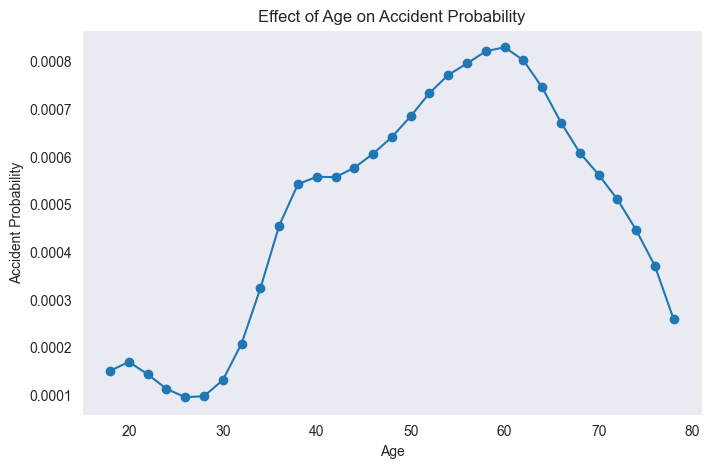

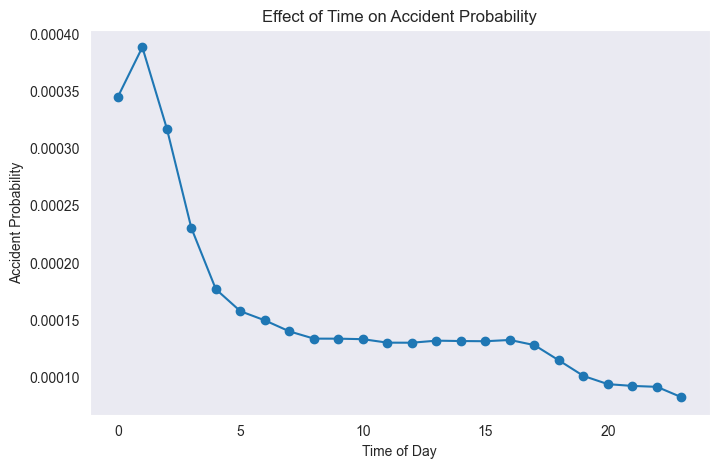

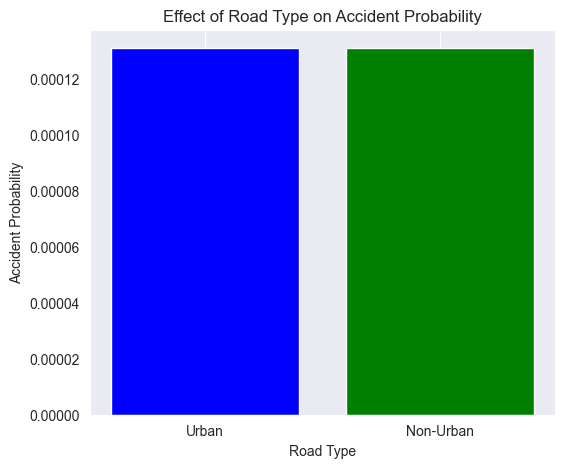

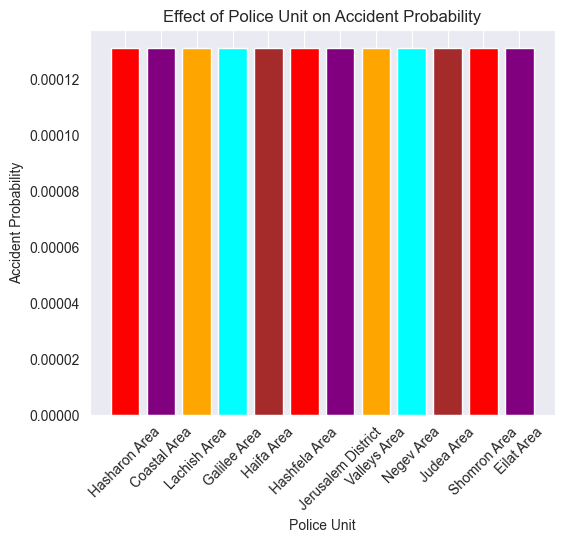

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Define base parameters
base_time = 15  # Noon
base_age = 30
base_road_type = "Urban"
base_police_unit = "Coastal Area"

# --- 1. Vary Age ---
ages = np.arange(18, 80, 2)  # Age from 18 to 80 in steps of 2
age_probs = [accident_probability(base_time, age, base_road_type, base_police_unit) for age in ages]

plt.figure(figsize=(8, 5))
plt.plot(ages, age_probs, marker='o', linestyle='-')
plt.xlabel("Age")
plt.ylabel("Accident Probability")
plt.title("Effect of Age on Accident Probability")
plt.grid()
plt.show()

# --- 2. Vary Time ---
times = np.arange(0, 24, 1)  # Time from 0 to 23 in steps of 1 hour
time_probs = [accident_probability(time, base_age, base_road_type, base_police_unit) for time in times]

plt.figure(figsize=(8, 5))
plt.plot(times, time_probs, marker='o', linestyle='-')
plt.xlabel("Time of Day")
plt.ylabel("Accident Probability")
plt.title("Effect of Time on Accident Probability")
plt.grid()
plt.show()

# --- 3. Vary Road Type ---
road_types = ["Urban", "Non-Urban"]
road_probs = [accident_probability(base_time, base_age, rt, base_police_unit) for rt in road_types]

plt.figure(figsize=(6, 5))
plt.bar(road_types, road_probs, color=['blue', 'green'])
plt.xlabel("Road Type")
plt.ylabel("Accident Probability")
plt.title("Effect of Road Type on Accident Probability")
plt.grid(axis='y')
plt.show()

# --- 4. Vary Police Unit ---
police_units = df["YEHIDA"].unique()  # Use actual police units from the dataset
police_probs = [accident_probability(base_time, base_age, base_road_type, pu) for pu in police_units]

plt.figure(figsize=(6, 5))
plt.bar(police_units, police_probs, color=['red', 'purple', 'orange', 'cyan', 'brown'])
plt.xlabel("Police Unit")
plt.ylabel("Accident Probability")
plt.title("Effect of Police Unit on Accident Probability")
plt.xticks(rotation=45)  # Rotate for better readability
plt.grid(axis='y')
plt.show()


In [15]:
# Re-import necessary libraries after execution state reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Define the corrected probability distributions
age_group_probs = np.array([0.1929, 0.1692, 0.1428, 0.1265, 0.1177, 0.1160, 0.1349])
age_groups = np.array(['15-20', '21-24', '25-34', '35-44', '45-54', '55-64', '65+'])

road_type_probs = np.array([0.2645, 0.7355])  # Non-Urban, Urban
police_unit_probs = np.array([
    0.0515,
    0.0228,
    0.2867,
    0.1974,
    0.0351,
    0.0290,
    0.0371,
    0.0398,
    0.2228,
    0.0779
])
hour_probs = np.array([
    0.0950, 0.1154, 0.1248, 0.1047, 0.0564, 0.0275, 0.0177, 0.0152,
    0.0139, 0.0142, 0.0144, 0.0164, 0.0185, 0.0183, 0.0201, 0.0208,
    0.0212, 0.0217, 0.0224, 0.0256, 0.0324, 0.0387, 0.0542, 0.0906
]) # 0,1,2,...,23:00

# Smooth probabilities using interpolation
age_smooth = np.linspace(15, 100, 100)
hour_smooth = np.linspace(0, 23, 100)

age_interpolated_probs = np.interp(age_smooth, np.linspace(15, 80, len(age_group_probs)), age_group_probs)
hour_interpolated_probs = np.interp(hour_smooth, np.linspace(0, 23, len(hour_probs)), hour_probs)

# Normalize probabilities
age_interpolated_probs /= np.sum(age_interpolated_probs)
hour_interpolated_probs /= np.sum(hour_interpolated_probs)

# Fit a Kernel Density Estimation (KDE) for better probability smoothing
kde_age = gaussian_kde(age_smooth, weights=age_interpolated_probs)
print(age_interpolated_probs)
kde_hour = gaussian_kde(hour_smooth, weights=hour_interpolated_probs)
print(hour_interpolated_probs)

# Normalizing KDE outputs
age_pdf = kde_age(age_smooth)
hour_pdf = kde_hour(hour_smooth)

age_pdf /= np.sum(age_pdf)
hour_pdf /= np.sum(hour_pdf)

# Convert probabilities to continuous functions
def smooth_age_probability(age):
    """Returns a probability density estimate for age."""
    return np.interp(age, age_smooth, age_pdf)
#
# def smooth_hour_probability(hour):
#     """Returns a probability density estimate for time of day."""
#     return np.interp(hour, hour_smooth, hour_pdf)
#

# Incorporate sinusoidal transformation without distorting the original time distribution
def smooth_hour_probability_sin_corrected(time):
    """Returns a probability density estimate for time of day while preserving the original distribution."""
    # Convert time to a sinusoidal feature
    time_sin = np.sin(2 * np.pi * time / 24)
    time_cos = np.cos(2 * np.pi * time / 24)

    # Get the original probability estimate
    base_prob = np.interp(time, hour_smooth, hour_pdf)

    # Apply a small sinusoidal adjustment to retain the base distribution shape while ensuring smooth periodicity
    adjustment = 0.05 * (np.interp(time_sin, np.sin(2 * np.pi * hour_smooth / 24), hour_pdf) +
                          np.interp(time_cos, np.cos(2 * np.pi * hour_smooth / 24), hour_pdf))

    return base_prob + adjustment

def smooth_road_type_probability(road_type):
    """Returns a probability estimate for road type."""
    if road_type == "Urban":
        return road_type_probs[1]
    elif road_type == "Non-Urban":
        return road_type_probs[0]
    return np.mean(road_type_probs)  # Default to mean if road type is unknown

def smooth_police_unit_probability(police_unit_index):
    """Returns a probability estimate for police unit."""
    if 0 <= police_unit_index < len(police_unit_probs):
        return police_unit_probs[police_unit_index]
    return np.mean(police_unit_probs)  # Default to mean if index is out of range

def accident_probability(age, time, road_type, police_unit_index):
    """
    Computes the probability of an accident based on the given parameters using smoothed probabilities.

    Parameters:
    - age (int): Driver's age.
    - time (float): Fractional hour of the day.
    - road_type (str): Either "Urban" or "Non-Urban".
    - police_unit_index (int): Index representing the police unit.

    Returns:
    - Estimated probability of an accident.
    """
    # Get smoothed probabilities
    age_prob = smooth_age_probability(age)
    time_prob = smooth_hour_probability_sin_corrected(time)
    road_prob = smooth_road_type_probability(road_type)
    police_prob = smooth_police_unit_probability(police_unit_index)

    # Compute overall probability as a product of independent probabilities
    accident_prob = age_prob * time_prob * road_prob * police_prob
    return accident_prob

[0.01392181 0.01378625 0.01365069 0.01351513 0.01337957 0.01324401
 0.01310845 0.01297289 0.01283733 0.01270177 0.01256621 0.01243064
 0.01229508 0.01215362 0.01200261 0.01185161 0.01170061 0.0115496
 0.0113986  0.01124759 0.01109659 0.01094559 0.01079458 0.01064358
 0.01049257 0.01034157 0.01023474 0.01014151 0.01004827 0.00995504
 0.00986181 0.00976857 0.00967534 0.00958211 0.00948887 0.00939564
 0.0093024  0.00920917 0.00912225 0.00907191 0.00902158 0.00897124
 0.00892091 0.00887057 0.00882024 0.0087699  0.00871957 0.00866923
 0.0086189  0.00856856 0.00851823 0.00848939 0.00847967 0.00846995
 0.00846022 0.0084505  0.00844078 0.00843105 0.00842133 0.0084116
 0.00840188 0.00839216 0.00838243 0.00837271 0.00847042 0.00857852
 0.00868663 0.00879473 0.00890284 0.00901094 0.00911905 0.00922716
 0.00933526 0.00944337 0.00955147 0.00965958 0.00973589 0.00973589
 0.00973589 0.00973589 0.00973589 0.00973589 0.00973589 0.00973589
 0.00973589 0.00973589 0.00973589 0.00973589 0.00973589 0.009735

shira added changes - for checks of the function

/var/folders/41/w6jzpcx12jn19d6sw459fl_r0000gp/T/ipykernel_43197/2685076569.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.2f}e-5'.format(x / 1e-5) for x in current_values])


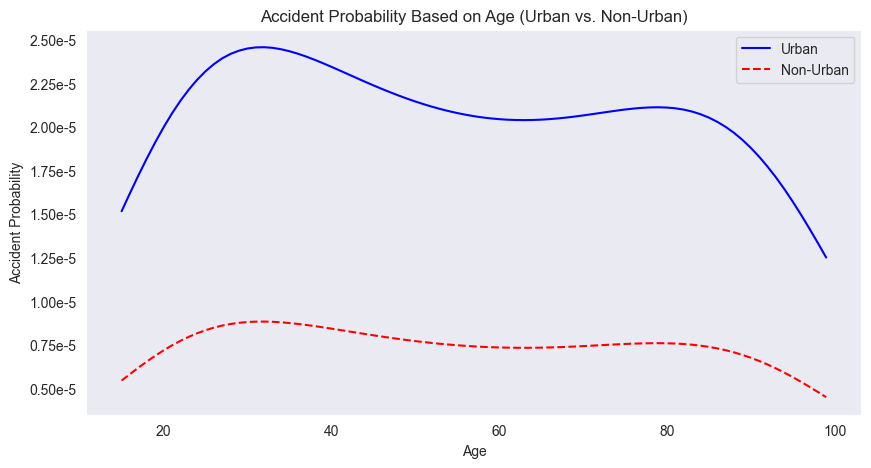

/var/folders/41/w6jzpcx12jn19d6sw459fl_r0000gp/T/ipykernel_43197/2685076569.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.2f}e-5'.format(x / 1e-5) for x in current_values])


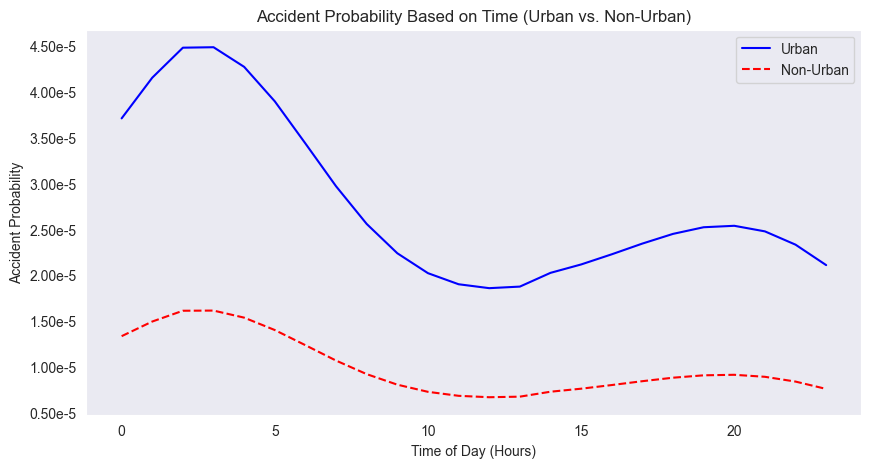

Total number of police units: 10


In [16]:

# Generate test cases for visualization
test_ages = np.arange(15, 100)
test_times = np.arange(0, 24, 1)

# Compute accident probabilities for age (Urban and Non-Urban)
age_probs_urban = [accident_probability(age, 18, "Urban", 2) for age in test_ages]
age_probs_non_urban = [accident_probability(age, 18, "Non-Urban", 2) for age in test_ages]

# Compute accident probabilities for time (Urban and Non-Urban)
time_probs_urban = [accident_probability(30, time, "Urban", 2) for time in test_times]
time_probs_non_urban = [accident_probability(30, time, "Non-Urban", 2) for time in test_times]

# Plot probability trends for Age (Urban vs. Non-Urban in the same graph)
plt.figure(figsize=(10, 5))
plt.plot(test_ages, age_probs_urban, label="Urban", linestyle='-', color='blue')
plt.plot(test_ages, age_probs_non_urban, label="Non-Urban", linestyle='--', color='red')
plt.xlabel("Age")
plt.ylabel("Accident Probability")  # Keep this as is. We're modifying the *tick labels*, not the axis label itself
plt.title("Accident Probability Based on Age (Urban vs. Non-Urban)")
plt.legend()
plt.grid()

#  vvvvvv   ADD THESE LINES HERE   vvvvvv
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.2f}e-5'.format(x / 1e-5) for x in current_values])
#  ^^^^^^   ADD THESE LINES HERE   ^^^^^^

plt.show() # Keep plt.show() AFTER the yticklabels are set!

# Plot probability trends for Time (Urban vs. Non-Urban in the same graph)
plt.figure(figsize=(10, 5))
plt.plot(test_times, time_probs_urban, label="Urban", linestyle='-', color='blue')
plt.plot(test_times, time_probs_non_urban, label="Non-Urban", linestyle='--', color='red')
plt.xlabel("Time of Day (Hours)")
plt.ylabel("Accident Probability") # Keep this as is. We're modifying the *tick labels*, not the axis label itself
plt.title("Accident Probability Based on Time (Urban vs. Non-Urban)")
plt.legend()
plt.grid()

#  vvvvvv   ADD THESE LINES HERE   vvvvvv
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.2f}e-5'.format(x / 1e-5) for x in current_values])
#  ^^^^^^   ADD THESE LINES HERE   ^^^^^^

plt.show() # Keep plt.show() AFTER the yticklabels are set!

# Print the total number of police units
num_police_units = len(police_unit_probs)
print(f"Total number of police units: {num_police_units}")


checks for our function- accident_probability:

/var/folders/41/w6jzpcx12jn19d6sw459fl_r0000gp/T/ipykernel_43197/3863904284.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.2f}e-5'.format(x / 1e-5) for x in current_values])


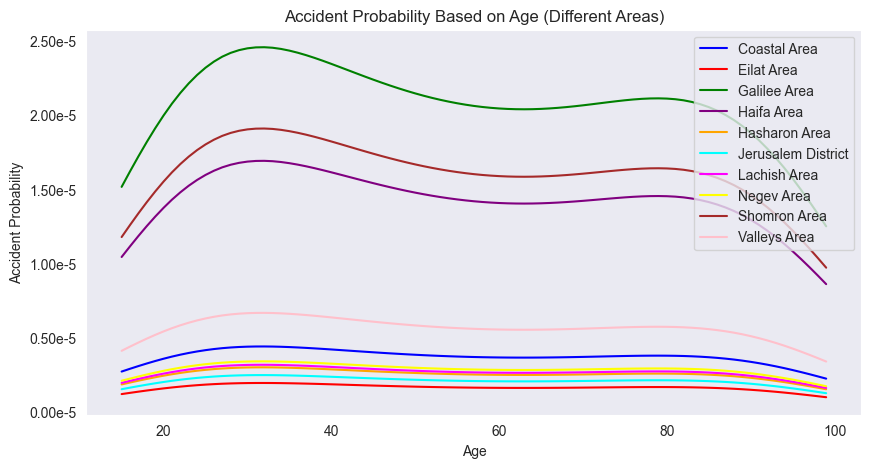

/var/folders/41/w6jzpcx12jn19d6sw459fl_r0000gp/T/ipykernel_43197/3863904284.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.2f}e-5'.format(x / 1e-5) for x in current_values])


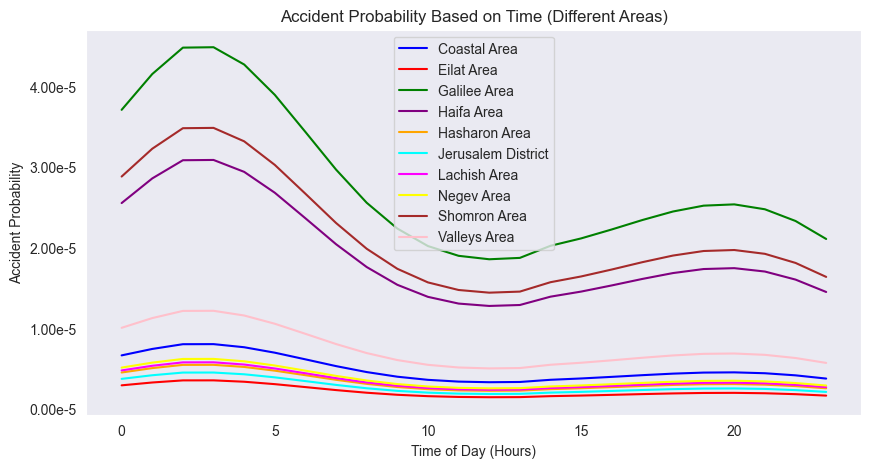

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Define mapping: Police Unit Index → Corresponding Area
area_categories = [
    "Coastal Area",
    "Eilat Area",
    "Galilee Area",
    "Haifa Area",
    "Hasharon Area",
    "Jerusalem District",
    "Lachish Area",
    "Negev Area",
    "Shomron Area",
    "Valleys Area"
]

# Ensure we are mapping correctly (10 police units)
police_units = list(range(10))  # 0 to 9

# Generate test cases for visualization
test_ages = np.arange(15, 100)
test_times = np.arange(0, 24, 1)

# Define 10 distinct colors for the areas (matching police units)
colors = [
    'blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta',
    'yellow', 'brown', 'pink'
]

# --- Plot probability trends for Age (Different Areas) ---
plt.figure(figsize=(10, 5))

for idx, police_unit in enumerate(police_units):
    area_name = area_categories[idx]  # Get the corresponding area name
    age_probs = [accident_probability(age, 18, "Urban", police_unit) for age in test_ages]
    plt.plot(test_ages, age_probs, label=f"{area_name}", linestyle='-', color=colors[idx])

plt.xlabel("Age")
plt.ylabel("Accident Probability")
plt.title("Accident Probability Based on Age (Different Areas)")
plt.legend()
plt.grid()

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.2f}e-5'.format(x / 1e-5) for x in current_values])
plt.show()

# --- Plot probability trends for Time (Different Areas) ---
plt.figure(figsize=(10, 5))

for idx, police_unit in enumerate(police_units):
    area_name = area_categories[idx]  # Get the corresponding area name
    time_probs = [accident_probability(30, time, "Urban", police_unit) for time in test_times]
    plt.plot(test_times, time_probs, label=f"{area_name}", linestyle='-', color=colors[idx])

plt.xlabel("Time of Day (Hours)")
plt.ylabel("Accident Probability")
plt.title("Accident Probability Based on Time (Different Areas)")
plt.legend()
plt.grid()

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.2f}e-5'.format(x / 1e-5) for x in current_values])

plt.show()


In [18]:
def test_accident_probability():
    """
    Runs a series of tests to validate that accident_probability behaves logically when
    changing each parameter (time, age, road type, police unit) while keeping others constant.
    """

    base_time = 12  # Noon
    base_age = 30
    base_road_type = "Urban"
    base_police_unit = 3  # Use the **index** instead of area name (e.g., "Coastal Area" → 3)

    # Get the base probability
    base_prob = accident_probability(base_age, base_time, base_road_type, base_police_unit)

    # --- 1. Check Effect of Time ---
    time_probs = []
    for time in range(0, 24, 3):  # Check every 3 hours
        time_probs.append(accident_probability(base_age, time, base_road_type, base_police_unit))

    assert min(time_probs) >= 0 and max(time_probs) <= 1, "Error: Time probability values out of range!"
    print("✅ Time variation produces probabilities in valid range.")

    assert time_probs[0] != time_probs[-1], "Error: Probability should change across different times!"
    print("✅ Probability changes across different times of day.")

    # --- 2. Check Effect of Age ---
    age_probs = []
    for age in range(18, 80, 10):  # Check every 10 years
        age_probs.append(accident_probability(age, base_time, base_road_type, base_police_unit))

    assert min(age_probs) >= 0 and max(age_probs) <= 1, "Error: Age probability values out of range!"
    print("✅ Age variation produces probabilities in valid range.")

    assert age_probs[0] != age_probs[-1], "Error: Probability should change for different ages!"
    print("✅ Probability changes with different ages.")

    # --- 3. Check Effect of Road Type ---
    road_types = ["Urban", "Non-Urban"]
    road_probs = {rt: accident_probability(base_age, base_time, rt, base_police_unit) for rt in road_types}

    assert all(0 <= p <= 1 for p in road_probs.values()), "Error: Road type probability out of range!"
    print("✅ Road type variation produces probabilities in valid range.")

    assert road_probs["Urban"] != road_probs["Non-Urban"], "Error: Probability should differ for road types!"
    print("✅ Probability differs between Urban and Non-Urban roads.")

    # --- 4. Check Effect of Police Unit ---
    police_units = list(range(10))  # Use indices (0-9) instead of area names
    police_probs = {pu: accident_probability(base_age, base_time, base_road_type, pu) for pu in police_units}

    assert all(0 <= p <= 1 for p in police_probs.values()), "Error: Police unit probability out of range!"
    print("✅ Police unit variation produces probabilities in valid range.")

    assert len(set(police_probs.values())) > 1, "Error: Probability should vary by police unit!"
    print("✅ Probability varies across different police units.")

    # --- 5. Check Consistency: Repeating the same call gives the same result ---
    repeated_prob = accident_probability(base_age, base_time, base_road_type, base_police_unit)
    assert base_prob == repeated_prob, "Error: Function is not deterministic for identical inputs!"
    print("✅ Function is deterministic (same input → same output).")

    print("\n🎉 All tests passed! The function behaves logically when changing parameters.")

# Run the test
test_accident_probability()


✅ Time variation produces probabilities in valid range.
✅ Probability changes across different times of day.
✅ Age variation produces probabilities in valid range.
✅ Probability changes with different ages.
✅ Road type variation produces probabilities in valid range.
✅ Probability differs between Urban and Non-Urban roads.
✅ Police unit variation produces probabilities in valid range.
✅ Probability varies across different police units.
✅ Function is deterministic (same input → same output).

🎉 All tests passed! The function behaves logically when changing parameters.


Choosing a threshold

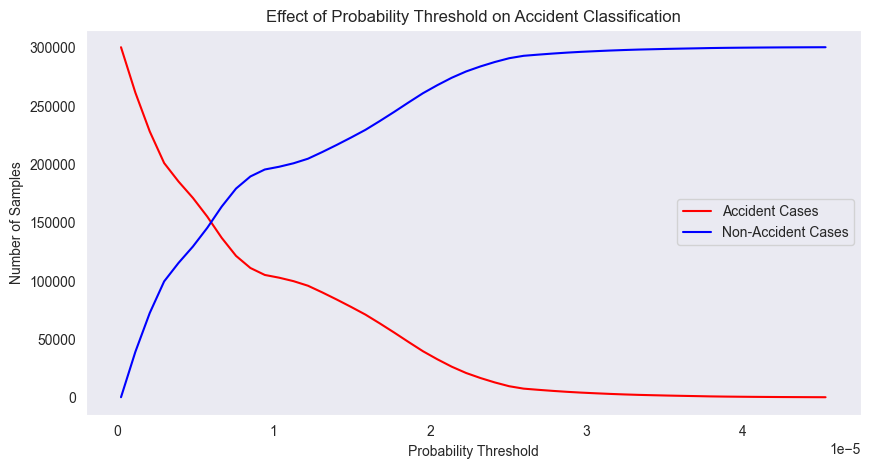

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define mapping from Area to Police Unit Index (assuming order matches)
area_to_police_unit = {
    'Valleys Area': 0, 'Negev Area': 1, 'Hasharon Area': 2, 'Coastal Area': 3,
    'Eilat Area': 4, 'Lachish Area': 5, 'Jerusalem District': 6, 'Haifa Area': 7,
    'Galilee Area': 8, 'Shomron Area': 9
}

def convert_time_to_decimal(time_str):
    """Converts HH:MM:SS time format to fractional hours."""
    h, m, s = map(int, time_str.split(":"))
    return h + m / 60 + s / 3600  # Convert to fractional hour

def analyze_thresholds(dataset_path):
    """
    Loads the dataset, applies accident_probability to each row,
    and finds an optimal threshold to classify accidents.
    """
    # Load dataset
    df = pd.read_csv(dataset_path)

    # Ensure necessary columns exist
    required_columns = ['Age', 'Time', 'Road Type', 'Area']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    # Convert time to fractional hours
    df['Time'] = df['Time'].apply(convert_time_to_decimal)

    # Map Area to Police Unit Index
    df['police_unit_index'] = df['Area'].map(area_to_police_unit)

    # Compute accident probabilities for each row
    df['predicted_prob'] = df.apply(lambda row: accident_probability(
        row['Age'], row['Time'], row['Road Type'], row['police_unit_index']
    ), axis=1)

    # Define probability thresholds to test
    thresholds = np.linspace(df['predicted_prob'].min(), df['predicted_prob'].max(), 50)

    # Store results
    results = []

    for threshold in thresholds:
        df['predicted_accident'] = df['predicted_prob'] > threshold

        # Count samples classified as accident vs. non-accident
        positive_cases = df['predicted_accident'].sum()
        negative_cases = len(df) - positive_cases

        results.append((threshold, positive_cases, negative_cases))

    # Convert to DataFrame
    results_df = pd.DataFrame(results, columns=['Threshold', 'Positive Cases', 'Negative Cases'])

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(results_df['Threshold'], results_df['Positive Cases'], label="Accident Cases", color='red')
    plt.plot(results_df['Threshold'], results_df['Negative Cases'], label="Non-Accident Cases", color='blue')
    plt.xlabel("Probability Threshold")
    plt.ylabel("Number of Samples")
    plt.title("Effect of Probability Threshold on Accident Classification")
    plt.legend()
    plt.grid()
    plt.show()

    return results_df

random_dataset_path = os.path.join(os.getcwd(), 'random_dataset.csv')
random_data.to_csv(random_dataset_path, index=False)
# Run analysis
results_df = analyze_thresholds(random_dataset_path)


Compare between different tresholds and their results

In [20]:
import pandas as pd
import numpy as np

# Load the dataset
dataset_path =  '../Project-RideShare/random_dataset.csv'
df = pd.read_csv(dataset_path)

#print(df.head(2))

# Define mapping from Area to Police Unit Index
area_to_police_unit = {
    'Valleys Area': 0, 'Negev Area': 1, 'Hasharon Area': 2, 'Coastal Area': 3,
    'Eilat Area': 4, 'Lachish Area': 5, 'Jerusalem District': 6, 'Haifa Area': 7,
    'Galilee Area': 8, 'Shomron Area': 9
}

# Convert time to fractional hours
def convert_time_to_decimal(time_str):
    """Converts HH:MM:SS time format to fractional hours."""
    h, m, s = map(int, time_str.split(":"))
    return h + m / 60 + s / 3600

df['Time'] = df['Time'].apply(convert_time_to_decimal)
df['police_unit_index'] = df['Area'].map(area_to_police_unit)

# Compute accident probabilities for each row using accident_probability function
df['predicted_prob'] = df.apply(lambda row: accident_probability(
    row['Age'], row['Time'], row['Road Type'], row['police_unit_index']
), axis=1)

# Define a range of thresholds (1e-5 to 3e-5)
thresholds = np.linspace(0.2e-5, 5e-5, 20)

# Try different thresholds and print results
for threshold in thresholds:
    positive_cases = (df['predicted_prob'] > threshold).sum()
    negative_cases = len(df) - positive_cases

    print(f"Threshold: {threshold:.6e} → Positive: {positive_cases}, Negative: {negative_cases}")


Threshold: 2.000000e-06 → Positive: 230624, Negative: 69376
Threshold: 4.526316e-06 → Positive: 176059, Negative: 123941
Threshold: 7.052632e-06 → Positive: 129636, Negative: 170364
Threshold: 9.578947e-06 → Positive: 104404, Negative: 195596
Threshold: 1.210526e-05 → Positive: 96070, Negative: 203930
Threshold: 1.463158e-05 → Positive: 79426, Negative: 220574
Threshold: 1.715789e-05 → Positive: 60081, Negative: 239919
Threshold: 1.968421e-05 → Positive: 38318, Negative: 261682
Threshold: 2.221053e-05 → Positive: 21322, Negative: 278678
Threshold: 2.473684e-05 → Positive: 10533, Negative: 289467
Threshold: 2.726316e-05 → Positive: 6003, Negative: 293997
Threshold: 2.978947e-05 → Positive: 3851, Negative: 296149
Threshold: 3.231579e-05 → Positive: 2437, Negative: 297563
Threshold: 3.484211e-05 → Positive: 1530, Negative: 298470
Threshold: 3.736842e-05 → Positive: 853, Negative: 299147
Threshold: 3.989474e-05 → Positive: 403, Negative: 299597
Threshold: 4.242105e-05 → Positive: 154, Nega

Find Top & Bottom 30 Samples

In [21]:
# Get the top 30 rows with the highest probability
top_30 = df.nlargest(30, 'predicted_prob')

# Get the bottom 30 rows with the lowest probability
bottom_30 = df.nsmallest(30, 'predicted_prob')

# Print the top 30 highest probability rows with their parameters
print("\n🔹 **Top 30 Samples with Highest Probability:**")
for _, row in top_30.iterrows():
    print(f"Age: {row['Age']}, Time: {row['Time']:.2f}, Road Type: {row['Road Type']}, "
          f"Area: {row['Area']}, Probability: {row['predicted_prob']:.8f}")

# Print the bottom 30 lowest probability rows with their parameters
print("\n🔹 **Bottom 30 Samples with Lowest Probability:**")
for _, row in bottom_30.iterrows():
    print(f"Age: {row['Age']}, Time: {row['Time']:.2f}, Road Type: {row['Road Type']}, "
          f"Area: {row['Area']}, Probability: {row['predicted_prob']:.8f}")



🔹 **Top 30 Samples with Highest Probability:**
Age: 31, Time: 2.57, Road Type: Urban, Area: Hasharon Area, Probability: 0.00004527
Age: 31, Time: 2.50, Road Type: Urban, Area: Hasharon Area, Probability: 0.00004527
Age: 33, Time: 2.43, Road Type: Urban, Area: Hasharon Area, Probability: 0.00004521
Age: 33, Time: 2.63, Road Type: Urban, Area: Hasharon Area, Probability: 0.00004520
Age: 31, Time: 2.85, Road Type: Urban, Area: Hasharon Area, Probability: 0.00004514
Age: 31, Time: 2.17, Road Type: Urban, Area: Hasharon Area, Probability: 0.00004512
Age: 33, Time: 2.88, Road Type: Urban, Area: Hasharon Area, Probability: 0.00004506
Age: 30, Time: 2.23, Road Type: Urban, Area: Hasharon Area, Probability: 0.00004505
Age: 34, Time: 2.36, Road Type: Urban, Area: Hasharon Area, Probability: 0.00004505
Age: 33, Time: 2.13, Road Type: Urban, Area: Hasharon Area, Probability: 0.00004504
Age: 33, Time: 2.92, Road Type: Urban, Area: Hasharon Area, Probability: 0.00004502
Age: 31, Time: 2.03, Road Ty

add

In [22]:
import pandas as pd
import numpy as np

# Load the dataset
dataset_path = os.path.join(os.getcwd(), 'random_dataset.csv')
df = pd.read_csv(dataset_path)

# Define mapping from Area to Police Unit Index
area_to_police_unit = {
    'Valleys Area': 0, 'Negev Area': 1, 'Hasharon Area': 2, 'Coastal Area': 3,
    'Eilat Area': 4, 'Lachish Area': 5, 'Jerusalem District': 6, 'Haifa Area': 7,
    'Galilee Area': 8, 'Shomron Area': 9
}

# Convert time to fractional hours
def convert_time_to_decimal(time_str):
    """Converts HH:MM:SS time format to fractional hours."""
    h, m, s = map(int, time_str.split(":"))
    return h + m / 60 + s / 3600

df['Time'] = df['Time'].apply(convert_time_to_decimal)
df['police_unit_index'] = df['Area'].map(area_to_police_unit)

# Compute accident probabilities for each row using accident_probability function
df['predicted_prob'] = df.apply(lambda row: accident_probability(
    row['Age'], row['Time'], row['Road Type'], row['police_unit_index']
), axis=1)

# Choose a threshold for accident occurrence
# This can be adjusted based on the distribution of predicted probabilities
threshold = 2.555556e-05

# Add a column indicating whether an accident occurred
df['Accident'] = (df['predicted_prob'] > threshold).astype(int)

# Construct a relative path to the CSV file
output_file_path = os.path.join(os.getcwd(), 'random_dataset_with_accidents.csv')

# Save the DataFrame to the CSV file using the relative path
df.to_csv(output_file_path, index=False)

# Display the first few rows of the updated dataset
print(df.head())


   ID  Age           Area  Road Type       Time  police_unit_index  \
0   1   34   Valleys Area      Urban   5.052222                  0   
1   2   28  Hasharon Area  Non-Urban  10.256111                  2   
2   3   55  Hasharon Area  Non-Urban  12.883333                  2   
3   4   30   Valleys Area      Urban   6.308611                  0   
4   5   47  Hasharon Area  Non-Urban  17.003333                  2   

   predicted_prob  Accident  
0        0.000007         0  
1        0.000007         0  
2        0.000006         0  
3        0.000006         0  
4        0.000008         0  


how many accidents were tagged as positive:

In [23]:
# Calculate and print the number of accidents tagged as positive
positive_accidents = df['Accident'].sum()

print(f"Number of accidents tagged as positive: {positive_accidents}")


Number of accidents tagged as positive: 7846


Confusion Matrix:
 [[87428   179]
 [  115  2278]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     87607
           1       0.93      0.95      0.94      2393

    accuracy                           1.00     90000
   macro avg       0.96      0.97      0.97     90000
weighted avg       1.00      1.00      1.00     90000



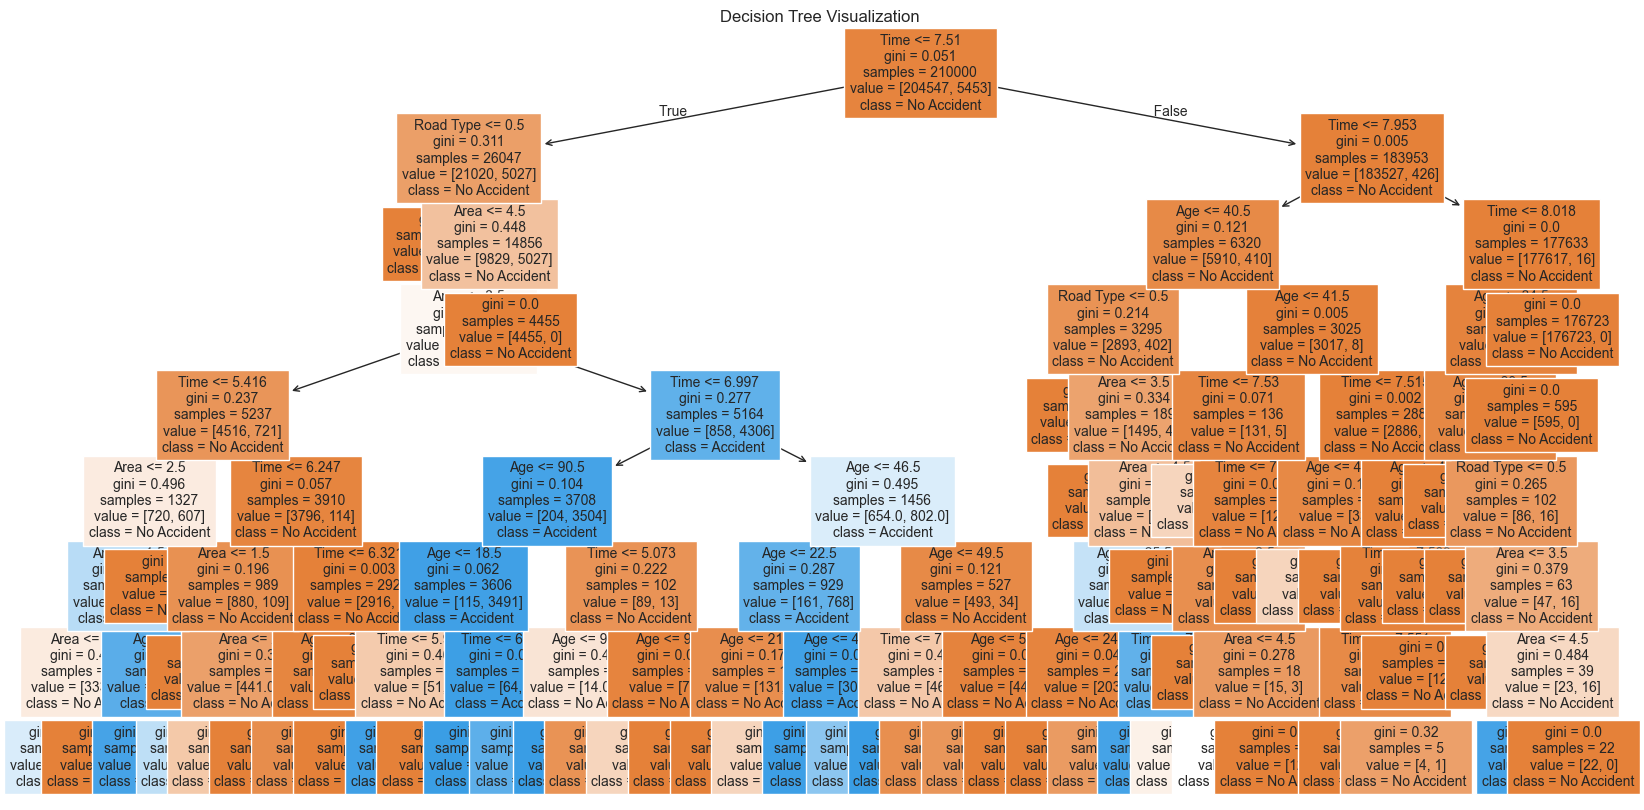

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
df = pd.read_csv('../Project-RideShare/random_dataset_with_accidents.csv')

# Data Preprocessing
# Convert categorical features into numerical
categorical_features = ['Area', 'Road Type']
for col in categorical_features:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

# Define features (X) and target (y)
X = df[['Age', 'Area', 'Road Type', 'Time']]
y = df['Accident']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 3,5,8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='accuracy')  # Using accuracy as the scoring metric

grid_search.fit(X_train, y_train)

# Get the best estimator
best_tree = grid_search.best_estimator_

# Evaluate the model
y_pred = best_tree.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_tree,
          feature_names=X.columns,
          class_names=['No Accident', 'Accident'],
          filled=True,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

Confusion Matrix:
 [[87607     0]
 [ 2393     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     87607
           1       0.00      0.00      0.00      2393

    accuracy                           0.97     90000
   macro avg       0.49      0.50      0.49     90000
weighted avg       0.95      0.97      0.96     90000



/Users/sgahtan/Library/Python/3.13/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sgahtan/Library/Python/3.13/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sgahtan/Library/Python/3.13/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

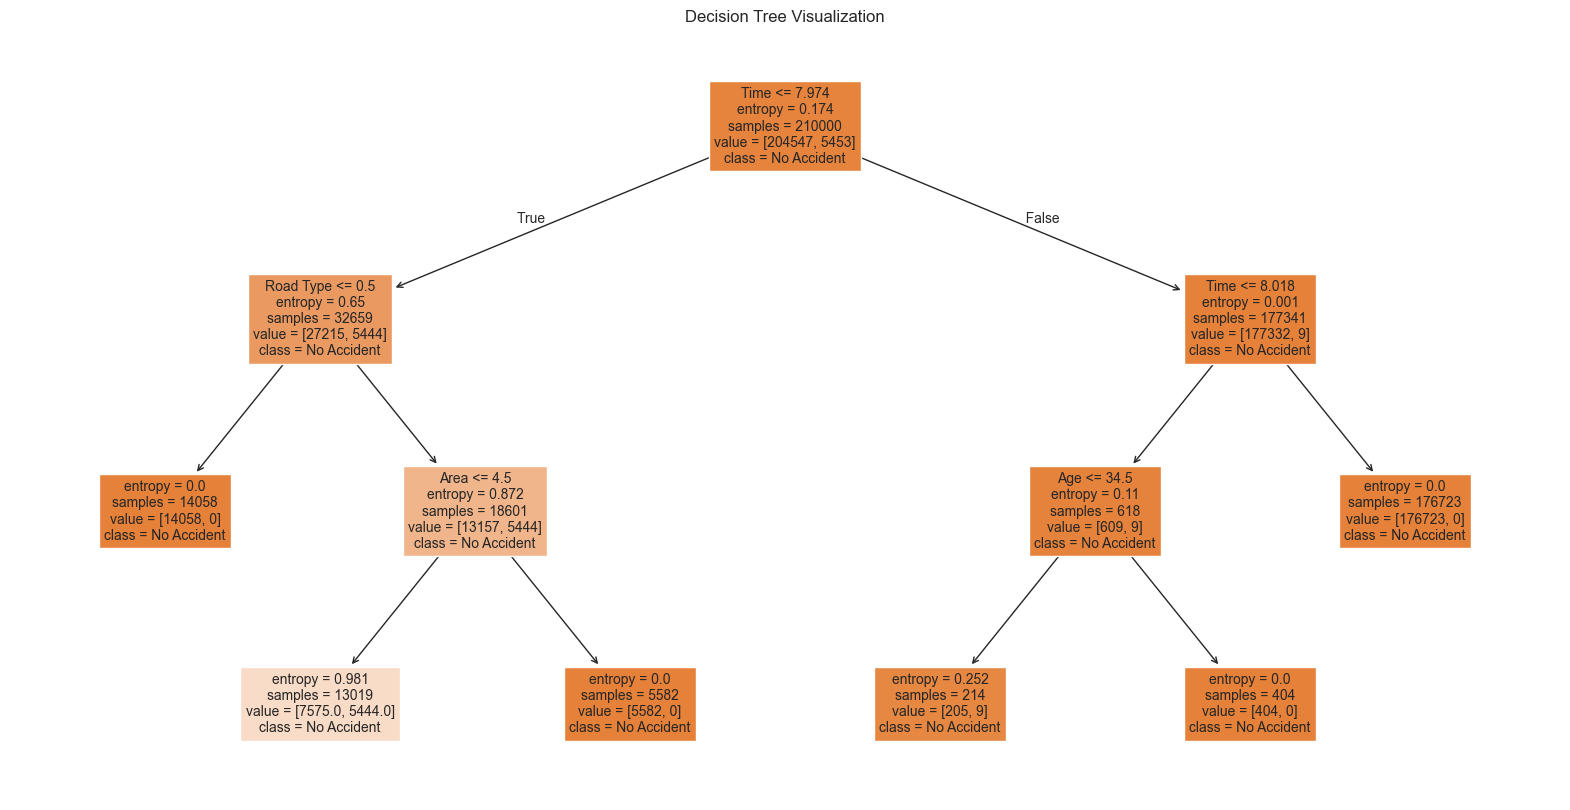

In [25]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='accuracy')  # Using accuracy as the scoring metric

grid_search.fit(X_train, y_train)

# Get the best estimator
best_tree = grid_search.best_estimator_

# Evaluate the model
y_pred = best_tree.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_tree,
          feature_names=X.columns,
          class_names=['No Accident', 'Accident'],
          filled=True,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

Confusion Matrix:
 [[87585    22]
 [   30  2363]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     87607
           1       0.99      0.99      0.99      2393

    accuracy                           1.00     90000
   macro avg       1.00      0.99      0.99     90000
weighted avg       1.00      1.00      1.00     90000



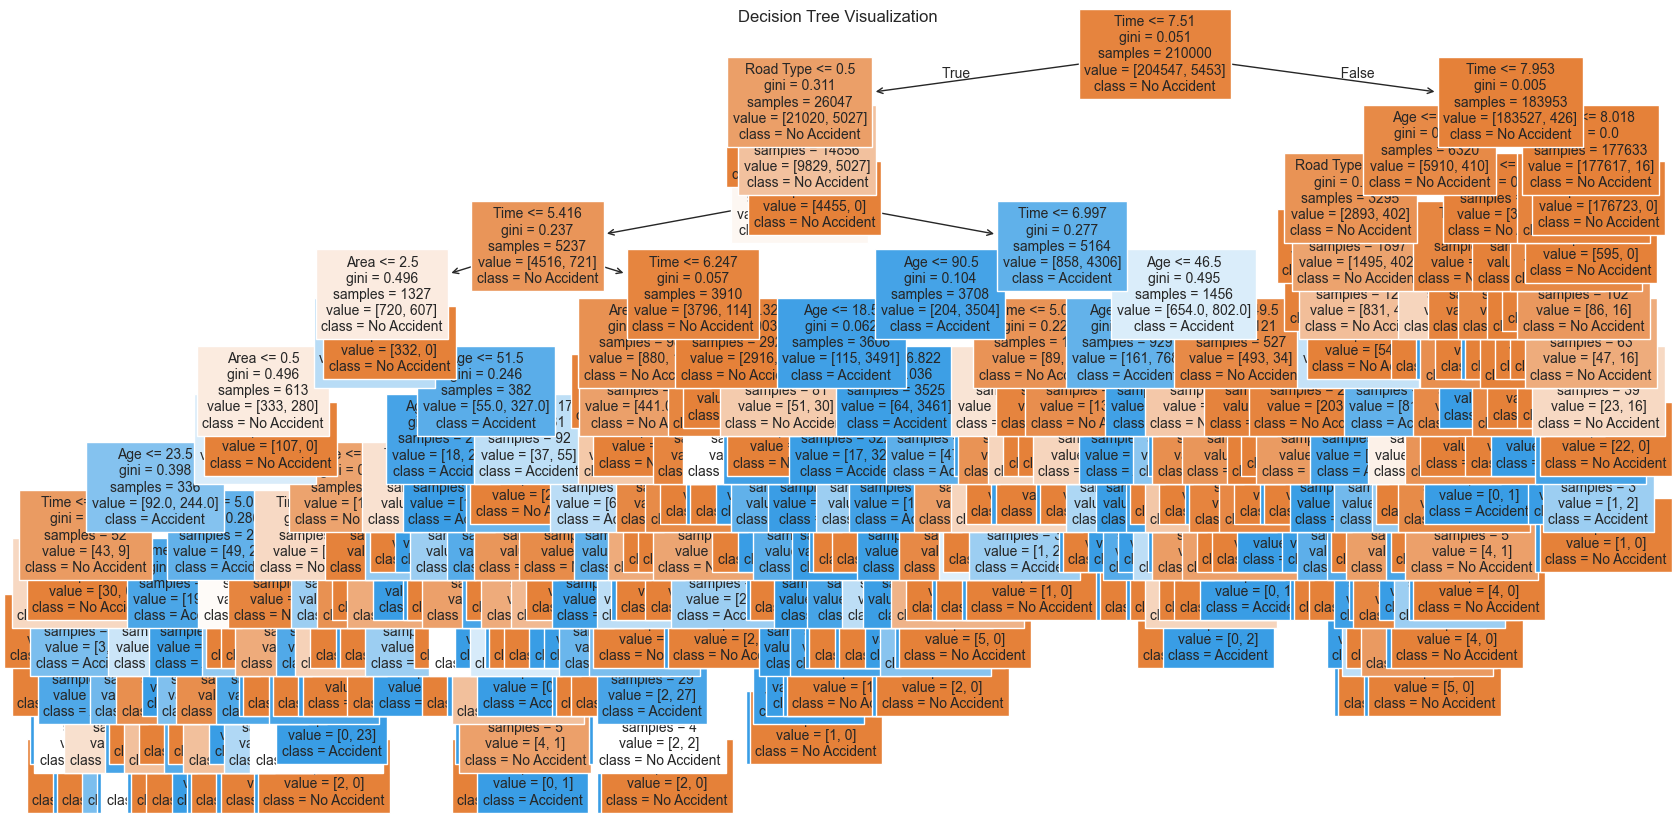

In [26]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='accuracy')  # Using accuracy as the scoring metric

grid_search.fit(X_train, y_train)

# Get the best estimator
best_tree = grid_search.best_estimator_

# Evaluate the model
y_pred = best_tree.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_tree,
          feature_names=X.columns,
          class_names=['No Accident', 'Accident'],
          filled=True,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


Running with threshold: 4.242105e-05
Number of accidents tagged as positive: 154
Confusion Matrix:
 [[89961     0]
 [   39     0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     89961
           1       0.00      0.00      0.00        39

    accuracy                           1.00     90000
   macro avg       0.50      0.50      0.50     90000
weighted avg       1.00      1.00      1.00     90000



/Users/sgahtan/Library/Python/3.13/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sgahtan/Library/Python/3.13/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sgahtan/Library/Python/3.13/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

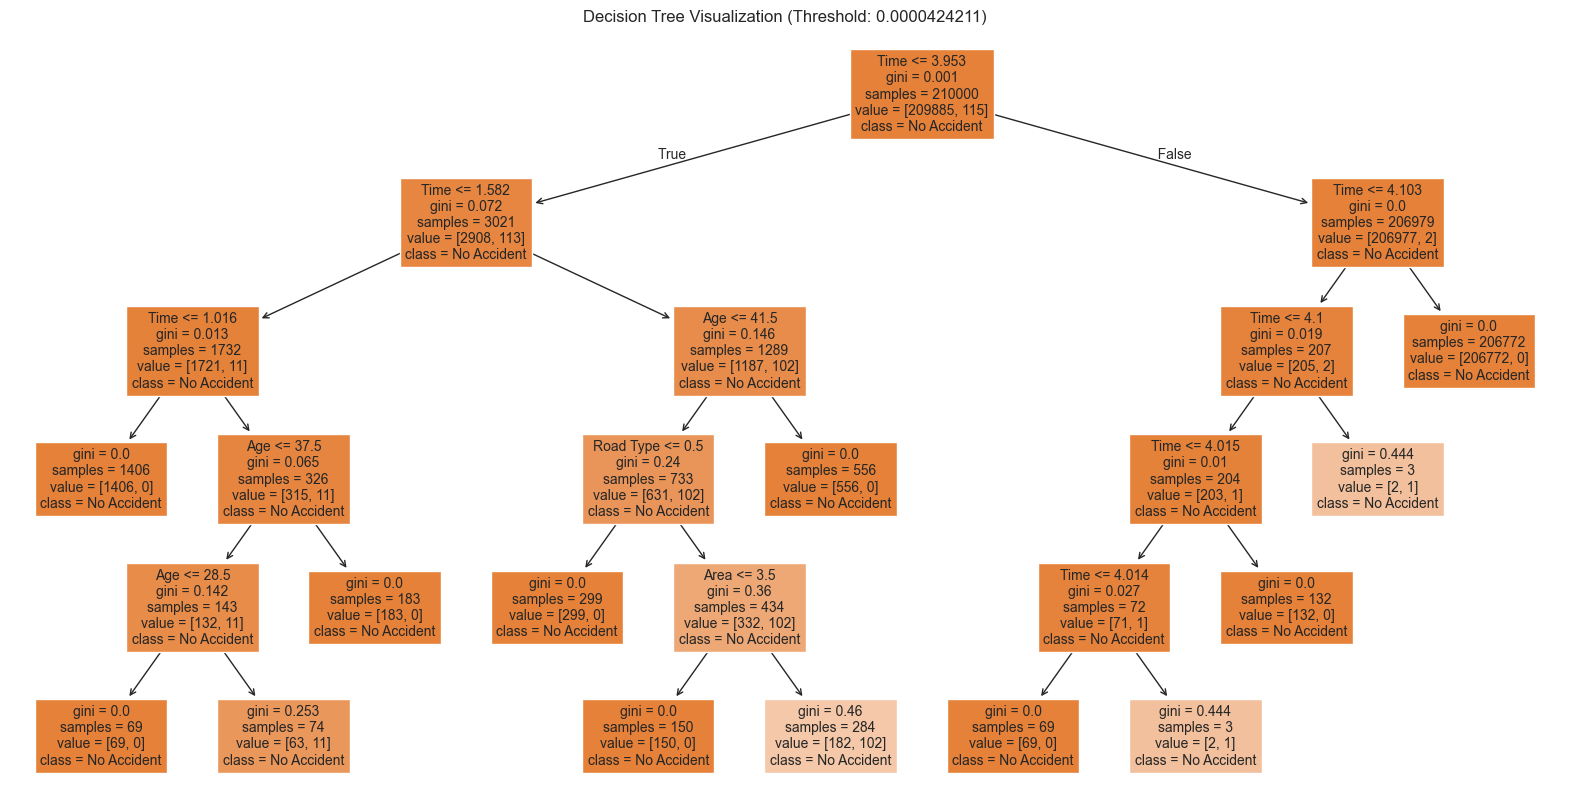


Running with threshold: 1.888889e-05
Number of accidents tagged as positive: 44642
Confusion Matrix:
 [[75519  1025]
 [ 3016 10440]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     76544
           1       0.91      0.78      0.84     13456

    accuracy                           0.96     90000
   macro avg       0.94      0.88      0.91     90000
weighted avg       0.95      0.96      0.95     90000



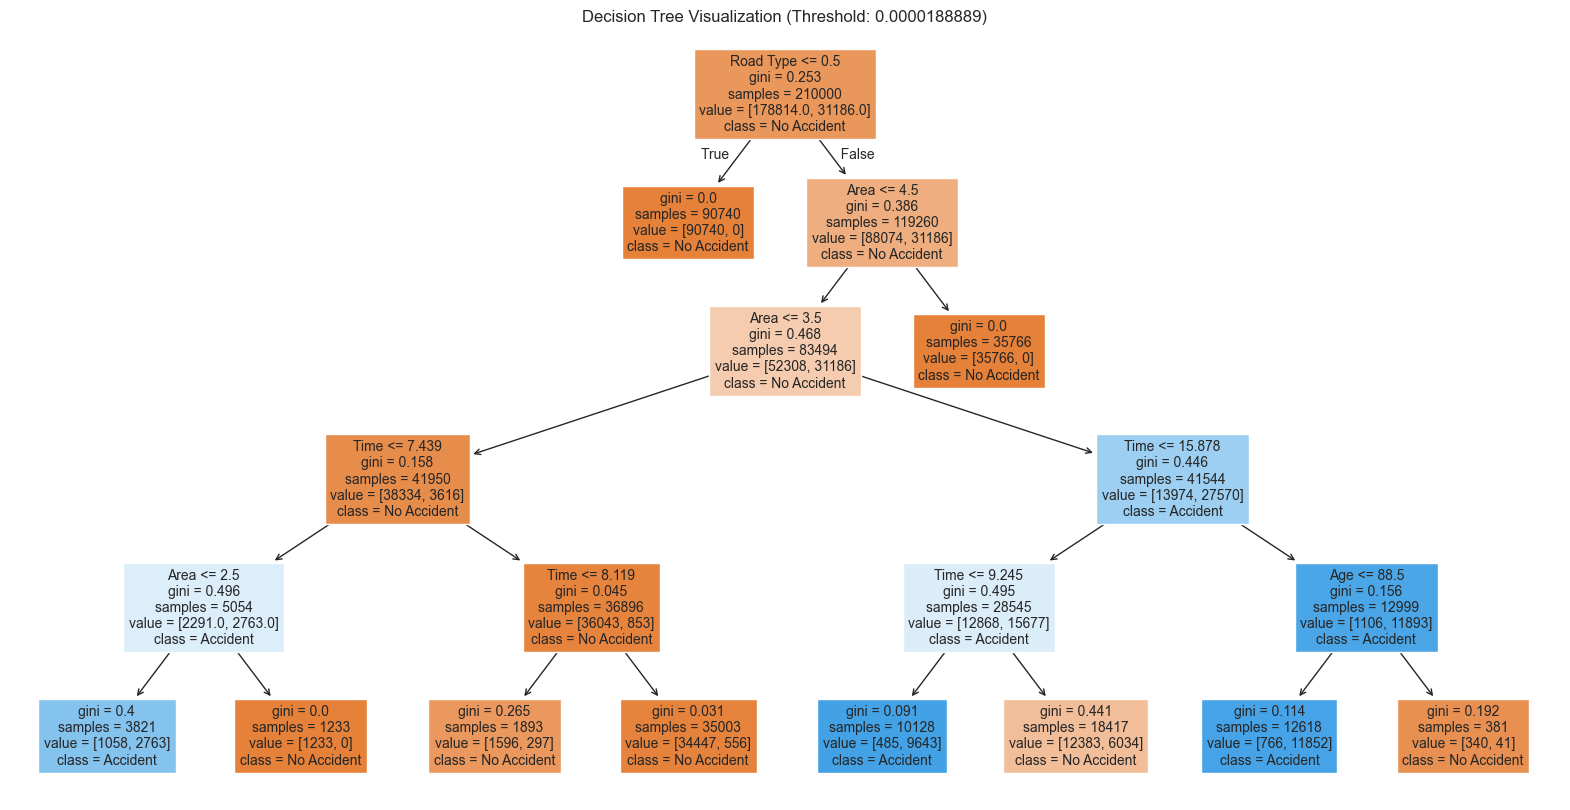


Running with threshold: 1e-05
Number of accidents tagged as positive: 103335
Confusion Matrix:
 [[56716  2039]
 [  278 30967]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     58755
           1       0.94      0.99      0.96     31245

    accuracy                           0.97     90000
   macro avg       0.97      0.98      0.97     90000
weighted avg       0.98      0.97      0.97     90000



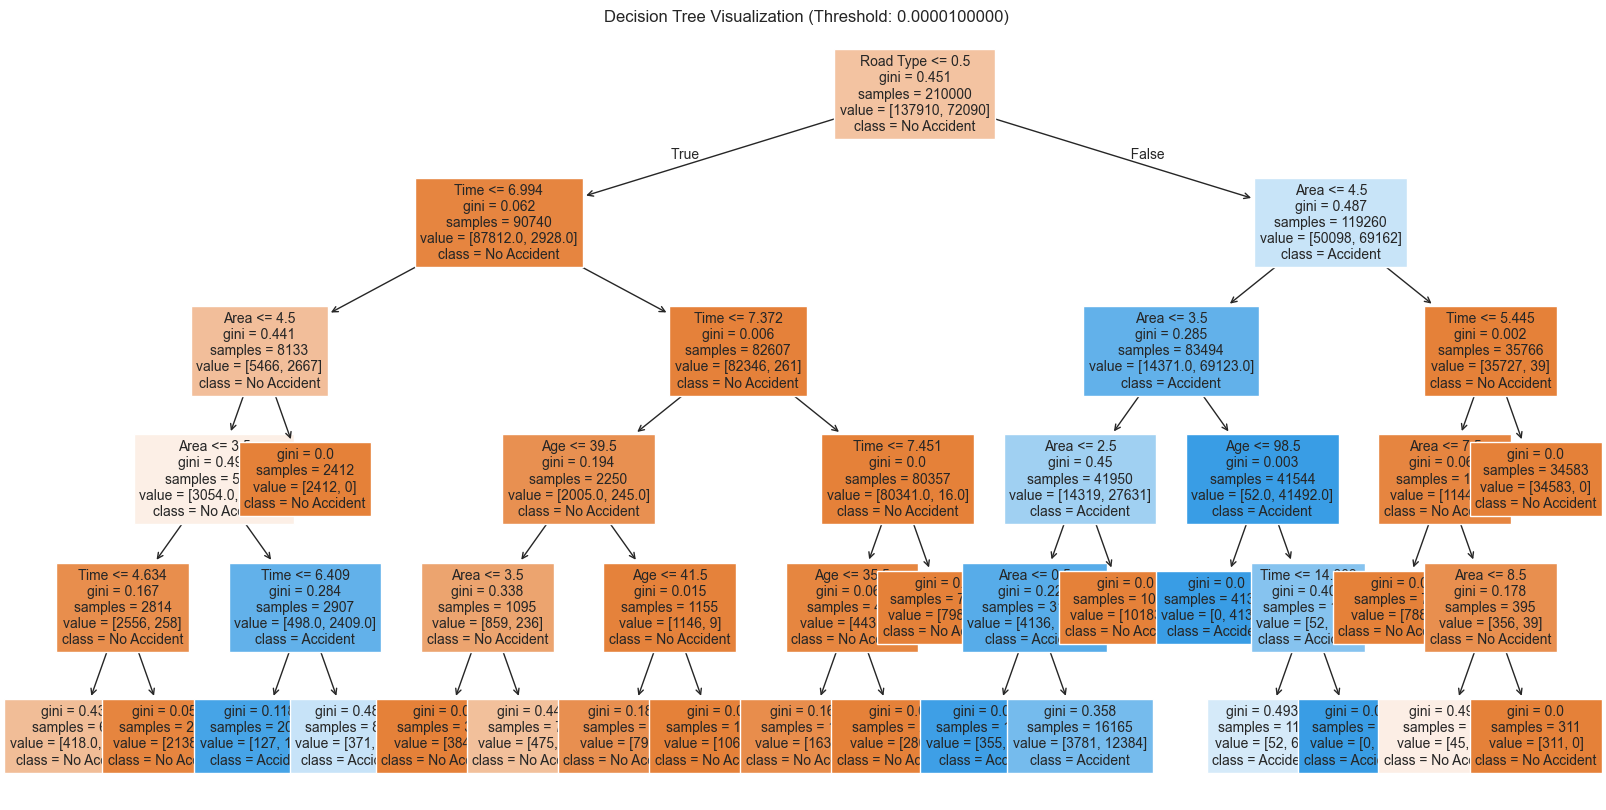

In [27]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Define threshold values
threshold_values = [4.242105e-05, 1.888889e-05, 1.000000e-05]

# Load the dataset
dataset_path = os.path.join(os.getcwd(), 'random_dataset.csv')
df = pd.read_csv(dataset_path)

# Define mapping from Area to Police Unit Index
area_to_police_unit = {
    'Valleys Area': 0, 'Negev Area': 1, 'Hasharon Area': 2, 'Coastal Area': 3,
    'Eilat Area': 4, 'Lachish Area': 5, 'Jerusalem District': 6, 'Haifa Area': 7,
    'Galilee Area': 8, 'Shomron Area': 9
}

# Convert time to fractional hours
def convert_time_to_decimal(time_str):
    """Converts HH:MM:SS time format to fractional hours."""
    h, m, s = map(int, time_str.split(":"))
    return h + m / 60 + s / 3600

df['Time'] = df['Time'].apply(convert_time_to_decimal)
df['police_unit_index'] = df['Area'].map(area_to_police_unit)

# Iterate over each threshold
for threshold in threshold_values:
    print(f"\nRunning with threshold: {threshold}")

    # Compute accident probabilities
    df['predicted_prob'] = df.apply(lambda row: accident_probability(
        row['Age'], row['Time'], row['Road Type'], row['police_unit_index']
    ), axis=1)

    # Assign accidents based on threshold
    df['Accident'] = (df['predicted_prob'] > threshold).astype(int)

    # Print number of positive accidents
    positive_accidents = df['Accident'].sum()
    print(f"Number of accidents tagged as positive: {positive_accidents}")

    # Save dataset with threshold in filename
    output_file = os.path.join(os.getcwd(), f'random_dataset_with_accidents_{threshold:.10f}.csv')
    df.to_csv(output_file, index=False)

    # Train and evaluate Decision Tree model
    # Load the modified dataset
    df_model = pd.read_csv(output_file)

    # Convert categorical features into numerical
    categorical_features = ['Area', 'Road Type']
    for col in categorical_features:
        df_model[col] = df_model[col].astype('category').cat.codes

    # Define features (X) and target (y)
    X = df_model[['Age', 'Area', 'Road Type', 'Time']]
    y = df_model['Accident']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Hyperparameter tuning using GridSearchCV
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 3, 5]
    }

    grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                               param_grid,
                               cv=5,
                               scoring='accuracy')

    grid_search.fit(X_train, y_train)

    # Get the best model
    best_tree = grid_search.best_estimator_

    # Evaluate the model
    y_pred = best_tree.predict(X_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Visualize the Decision Tree
    plt.figure(figsize=(20, 10))
    plot_tree(best_tree,
              feature_names=X.columns,
              class_names=['No Accident', 'Accident'],
              filled=True,
              fontsize=10)
    plt.title(f"Decision Tree Visualization (Threshold: {threshold:.10f})")
    plt.show()


Adding Another Model - SVM

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC # Import SVM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler # Import Scaler
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Define threshold values
threshold_values = [2.555556e-05, 1.888889e-05, 1.444444e-05]

# Define mapping from Area to Police Unit Index
area_to_police_unit = {
    'Valleys Area': 0, 'Negev Area': 1, 'Hasharon Area': 2, 'Coastal Area': 3,
    'Eilat Area': 4, 'Lachish Area': 5, 'Jerusalem District': 6, 'Haifa Area': 7,
    'Galilee Area': 8, 'Shomron Area': 9
}

# Convert time to fractional hours
def convert_time_to_decimal(time_str):
    """Converts HH:MM:SS time format to fractional hours."""
    h, m, s = map(int, time_str.split(":"))
    return h + m / 60 + s / 3600

# Load the dataset
dataset_path = os.path.join(os.getcwd(), 'random_dataset.csv')
df = pd.read_csv(dataset_path)
df['Time'] = df['Time'].apply(convert_time_to_decimal)
df['police_unit_index'] = df['Area'].map(area_to_police_unit)

# Define mapping from Area to Police Unit Index
area_to_police_unit = {
    'Valleys Area': 0, 'Negev Area': 1, 'Hasharon Area': 2, 'Coastal Area': 3,
    'Eilat Area': 4, 'Lachish Area': 5, 'Jerusalem District': 6, 'Haifa Area': 7,
    'Galilee Area': 8, 'Shomron Area': 9
}

# Convert time to fractional hours
def convert_time_to_decimal(time_str):
    """Converts HH:MM:SS time format to fractional hours."""
    h, m, s = map(int, time_str.split(":"))
    return h + m / 60 + s / 3600

# Iterate over each threshold
for threshold in threshold_values:
    print(f"\nRunning with threshold: {threshold}")

    # Compute accident probabilities
    df['predicted_prob'] = df.apply(lambda row: accident_probability(
        row['Age'], row['Time'], row['Road Type'], row['police_unit_index']
    ), axis=1)

    # Assign accidents based on threshold
    df['Accident'] = (df['predicted_prob'] > threshold).astype(int)

    # Print number of positive accidents
    positive_accidents = df['Accident'].sum()
    print(f"Number of accidents tagged as positive: {positive_accidents}")

    # Save dataset with threshold in filename
    output_file = os.path.join(os.getcwd(), f'random_dataset_with_accidents_{threshold:.10f}.csv')
    df.to_csv(output_file, index=False)

    # Train and evaluate Decision Tree model
    # Load the modified dataset
    df_model = pd.read_csv(output_file)

    # Convert categorical features into numerical
    categorical_features = ['Area', 'Road Type']
    for col in categorical_features:
        df_model[col] = df_model[col].astype('category').cat.codes

    # Define features (X) and target (y)
    X = df_model[['Age', 'Area', 'Road Type', 'Time']]
    y = df_model['Accident']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Hyperparameter tuning using GridSearchCV
    param_grid = {
        'C': [0.1, 1, 10],  # Regularization parameter
        'gamma': [0.01, 0.1, 1],  # Kernel coefficient
        'kernel': ['rbf']  # Radial Basis Function kernel
    }

    grid_search = GridSearchCV(SVC(random_state=42),
                               param_grid,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=2) # Use all available cores

    grid_search.fit(X_train, y_train)

    # Get the best model
    best_svm = grid_search.best_estimator_

    # Evaluate the model
    y_pred = best_svm.predict(X_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))




Running with threshold: 2.555556e-05
Number of accidents tagged as positive: 7846


/Users/sgahtan/Library/Python/3.13/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
